# Final Project: Diabetes


## Part Zero: Installing dependencies and data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import random
#setting the seed for reproducibility
random.seed(2023)

In [3]:
url='https://drive.google.com/file/d/1XzUVXXbdIRyOX1cHIUMvw4h8K3mGJ1Uu/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

C:\Users\thoma\AppData\Local\Temp\ipykernel_7180\3328750550.py:3: DtypeWarning: Columns (6,7,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


Initially we look at our data frame called diabetes df and want to interprete the columns etc. also we will decide on the question we want to answer. Decision: wheter or not someone currently has diabetes.
For this we are in a little bit of a dillema regarding the question: What are we going to do with the data  of all the people that have status 2 and will 
develope Diabetes within 10years. Here domain knowledge would be usefull. If we know there are precursers that can influence diabetes outcome earlier than 10 years it wouldn't be feasible to include all people with status 2 as status 0 (no diabetes). However we would lose a lot of data. However a conversative approach would be best when we don't really know about the topic to make this decision. Hence dropping all rows that have diabetes status = 2 is ok.

([<matplotlib.axis.XTick at 0x1e79e4a2200>,
 [Text(0, 0, 'no'),
  Text(1, 0, 'yes'),
  Text(2, 0, 'will have developed within 10y')])

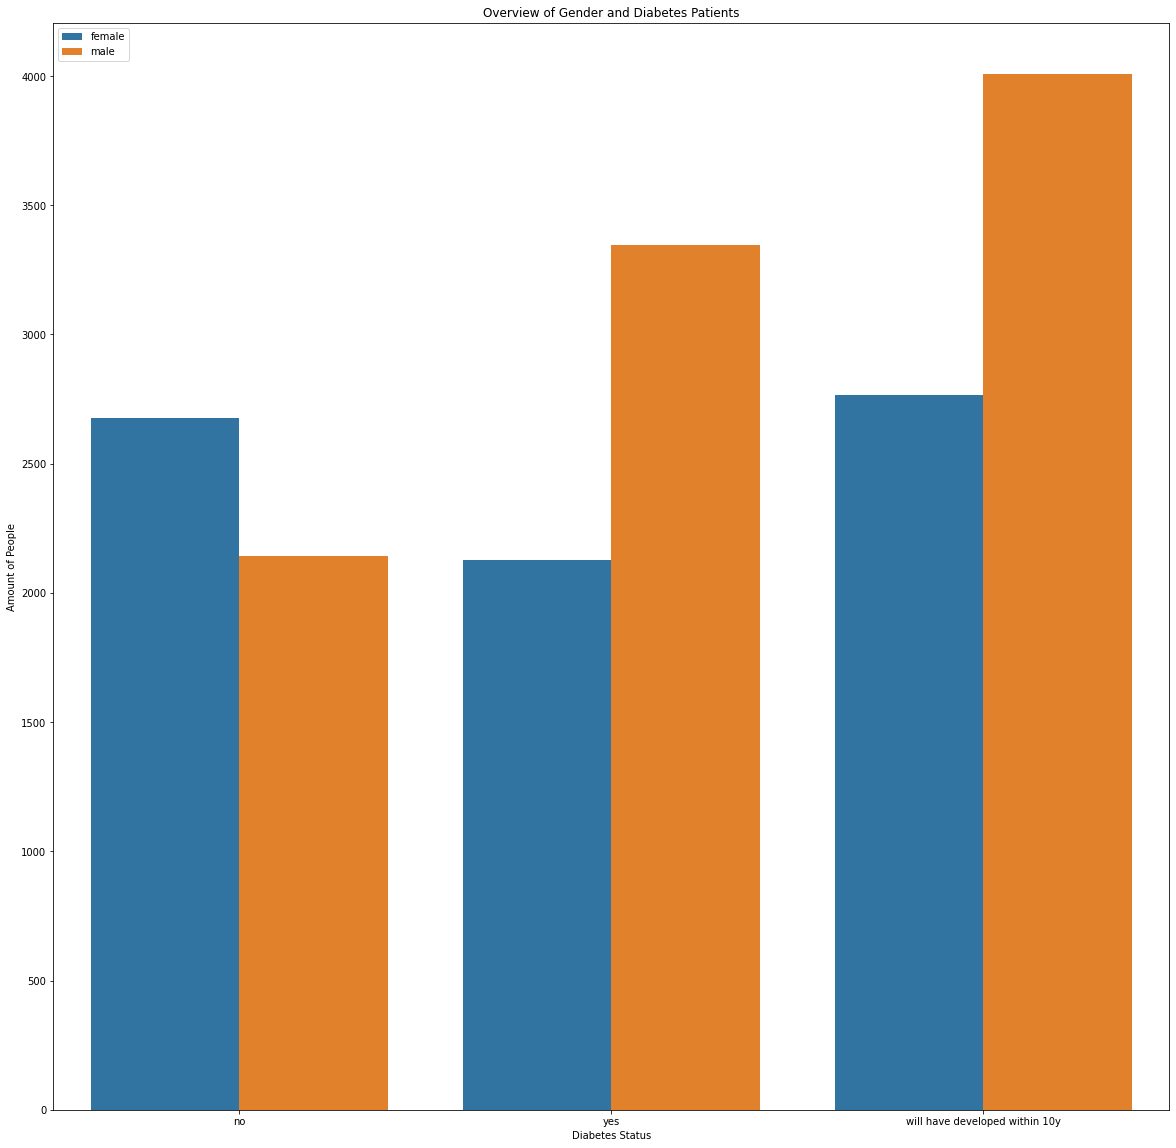

In [4]:
plt.figure(figsize=(20,20))
sns.countplot(x='diabetes_status',hue = '31-0.0',data = df)
plt.title("Overview of Gender and Diabetes Patients")
plt.xlabel("Diabetes Status")
plt.ylabel("Amount of People")
plt.legend(["female","male"],loc = 2)
plt.xticks(ticks=[0,1,2],labels=["no","yes","will have developed within 10y"])

In [5]:
mask = df.diabetes_status == 2 #remove not needed status from df
df = df[~mask]

Column names don't make sense so we have to adjust for that luckily this was already provided

In [6]:
basic_patient_info = { #'eid': 'PatientID', 
                      '31-0.0' : 'Gender', # 0 = female, 1 = male                         
            '21022-0.0': 'AgeRecruit', #in years
                        '21001-0.0' : 'BMI', 
                      '189-0.0' : "Townsend deprivation index", # a measure of material deprivation within a population.
                      '22040-0.0' : 'Summed MET minutes per week for all activity', #Metabolic equivalent exercise
                      '23099-0.0': "Body_fat_percentage",
                      '1160-0.0': 'Sleep duration',
                    '20116-0.0': 'Smoking status', # 0 = no / 1 = yes
                      '2453-0.0' : 'Cancer diagnosed by doctor',
                      '2463-0.0' : 'Fractured/broken bones in last 5 years',
                      '2473-0.0' : 'Other serious medical condition/disability diagnosed by doctor',
                      '6150-0.0' : 'Vascular/heart problems diagnosed by doctor'           }
df.rename(columns=basic_patient_info, inplace = True)

Since I want to work on the Metabolic Data I will already rename the columns too

In [7]:
NMRmetabolomics = {'23474-0.0': '3-Hydroxybutyrate',
 '23475-0.0': 'Acetate',
 '23476-0.0': 'Acetoacetate',
 '23477-0.0': 'Acetone',
 '23460-0.0': 'Alanine',
 '23479-0.0': 'Albumin',
 '23440-0.0': 'Apolipoprotein A1',
 '23439-0.0': 'Apolipoprotein B',
 '23433-0.0': 'Average Diameter for HDL Particles',
 '23432-0.0': 'Average Diameter for LDL Particles',
 '23431-0.0': 'Average Diameter for VLDL Particles',
 '23484-0.0': 'Cholesterol in Chylomicrons and Extremely Large VLDL',
 '23526-0.0': 'Cholesterol in IDL',
 '23561-0.0': 'Cholesterol in Large HDL',
 '23533-0.0': 'Cholesterol in Large LDL',
 '23498-0.0': 'Cholesterol in Large VLDL',
 '23568-0.0': 'Cholesterol in Medium HDL',
 '23540-0.0': 'Cholesterol in Medium LDL',
 '23505-0.0': 'Cholesterol in Medium VLDL',
 '23575-0.0': 'Cholesterol in Small HDL',
 '23547-0.0': 'Cholesterol in Small LDL',
 '23512-0.0': 'Cholesterol in Small VLDL',
 '23554-0.0': 'Cholesterol in Very Large HDL',
 '23491-0.0': 'Cholesterol in Very Large VLDL',
 '23519-0.0': 'Cholesterol in Very Small VLDL',
 '23485-0.0': 'Cholesteryl Esters in Chylomicrons and Extremely Large VLDL',
 '23418-0.0': 'Cholesteryl Esters in HDL',
 '23527-0.0': 'Cholesteryl Esters in IDL',
 '23417-0.0': 'Cholesteryl Esters in LDL',
 '23562-0.0': 'Cholesteryl Esters in Large HDL',
 '23534-0.0': 'Cholesteryl Esters in Large LDL',
 '23499-0.0': 'Cholesteryl Esters in Large VLDL',
 '23569-0.0': 'Cholesteryl Esters in Medium HDL',
 '23541-0.0': 'Cholesteryl Esters in Medium LDL',
 '23506-0.0': 'Cholesteryl Esters in Medium VLDL',
 '23576-0.0': 'Cholesteryl Esters in Small HDL',
 '23548-0.0': 'Cholesteryl Esters in Small LDL',
 '23513-0.0': 'Cholesteryl Esters in Small VLDL',
 '23416-0.0': 'Cholesteryl Esters in VLDL',
 '23555-0.0': 'Cholesteryl Esters in Very Large HDL',
 '23492-0.0': 'Cholesteryl Esters in Very Large VLDL',
 '23520-0.0': 'Cholesteryl Esters in Very Small VLDL',
 '23473-0.0': 'Citrate',
 '23404-0.0': 'Clinical LDL Cholesterol',
 '23481-0.0': 'Concentration of Chylomicrons and Extremely Large VLDL Particles',
 '23430-0.0': 'Concentration of HDL Particles',
 '23523-0.0': 'Concentration of IDL Particles',
 '23429-0.0': 'Concentration of LDL Particles',
 '23558-0.0': 'Concentration of Large HDL Particles',
 '23530-0.0': 'Concentration of Large LDL Particles',
 '23495-0.0': 'Concentration of Large VLDL Particles',
 '23565-0.0': 'Concentration of Medium HDL Particles',
 '23537-0.0': 'Concentration of Medium LDL Particles',
 '23502-0.0': 'Concentration of Medium VLDL Particles',
 '23572-0.0': 'Concentration of Small HDL Particles',
 '23544-0.0': 'Concentration of Small LDL Particles',
 '23509-0.0': 'Concentration of Small VLDL Particles',
 '23428-0.0': 'Concentration of VLDL Particles',
 '23551-0.0': 'Concentration of Very Large HDL Particles',
 '23488-0.0': 'Concentration of Very Large VLDL Particles',
 '23516-0.0': 'Concentration of Very Small VLDL Particles',
 '23478-0.0': 'Creatinine',
 '23443-0.0': 'Degree of Unsaturation',
 '23450-0.0': 'Docosahexaenoic Acid',
 '23486-0.0': 'Free Cholesterol in Chylomicrons and Extremely Large VLDL',
 '23422-0.0': 'Free Cholesterol in HDL',
 '23528-0.0': 'Free Cholesterol in IDL',
 '23421-0.0': 'Free Cholesterol in LDL',
 '23563-0.0': 'Free Cholesterol in Large HDL',
 '23535-0.0': 'Free Cholesterol in Large LDL',
 '23500-0.0': 'Free Cholesterol in Large VLDL',
 '23570-0.0': 'Free Cholesterol in Medium HDL',
 '23542-0.0': 'Free Cholesterol in Medium LDL',
 '23507-0.0': 'Free Cholesterol in Medium VLDL',
 '23577-0.0': 'Free Cholesterol in Small HDL',
 '23549-0.0': 'Free Cholesterol in Small LDL',
 '23514-0.0': 'Free Cholesterol in Small VLDL',
 '23420-0.0': 'Free Cholesterol in VLDL',
 '23556-0.0': 'Free Cholesterol in Very Large HDL',
 '23493-0.0': 'Free Cholesterol in Very Large VLDL',
 '23521-0.0': 'Free Cholesterol in Very Small VLDL',
 '23470-0.0': 'Glucose',
 '23461-0.0': 'Glutamine',
 '23462-0.0': 'Glycine',
 '23480-0.0': 'Glycoprotein Acetyls',
 '23406-0.0': 'HDL Cholesterol',
 '23463-0.0': 'Histidine',
 '23465-0.0': 'Isoleucine',
 '23405-0.0': 'LDL Cholesterol',
 '23471-0.0': 'Lactate',
 '23466-0.0': 'Leucine',
 '23449-0.0': 'Linoleic Acid',
 '23447-0.0': 'Monounsaturated Fatty Acids',
 '23444-0.0': 'Omega-3 Fatty Acids',
 '23445-0.0': 'Omega-6 Fatty Acids',
 '23468-0.0': 'Phenylalanine',
 '23437-0.0': 'Phosphatidylcholines',
 '23434-0.0': 'Phosphoglycerides',
 '23483-0.0': 'Phospholipids in Chylomicrons and Extremely Large VLDL',
 '23414-0.0': 'Phospholipids in HDL',
 '23525-0.0': 'Phospholipids in IDL',
 '23413-0.0': 'Phospholipids in LDL',
 '23560-0.0': 'Phospholipids in Large HDL',
 '23532-0.0': 'Phospholipids in Large LDL',
 '23497-0.0': 'Phospholipids in Large VLDL',
 '23567-0.0': 'Phospholipids in Medium HDL',
 '23539-0.0': 'Phospholipids in Medium LDL',
 '23504-0.0': 'Phospholipids in Medium VLDL',
 '23574-0.0': 'Phospholipids in Small HDL',
 '23546-0.0': 'Phospholipids in Small LDL',
 '23511-0.0': 'Phospholipids in Small VLDL',
 '23412-0.0': 'Phospholipids in VLDL',
 '23553-0.0': 'Phospholipids in Very Large HDL',
 '23490-0.0': 'Phospholipids in Very Large VLDL',
 '23518-0.0': 'Phospholipids in Very Small VLDL',
 '23446-0.0': 'Polyunsaturated Fatty Acids',
 '23472-0.0': 'Pyruvate',
 '23402-0.0': 'Remnant Cholesterol (Non-HDL, Non-LDL -Cholesterol)',
 '23448-0.0': 'Saturated Fatty Acids',
 '23438-0.0': 'Sphingomyelins',
 '23400-0.0': 'Total Cholesterol',
 '23401-0.0': 'Total Cholesterol Minus HDL-C',
 '23436-0.0': 'Total Cholines',
 '23464-0.0': 'Total Concentration of Branched-Chain Amino Acids (Leucine + Isoleucine + Valine)',
 '23427-0.0': 'Total Concentration of Lipoprotein Particles',
 '23415-0.0': 'Total Esterified Cholesterol',
 '23442-0.0': 'Total Fatty Acids',
 '23419-0.0': 'Total Free Cholesterol',
 '23482-0.0': 'Total Lipids in Chylomicrons and Extremely Large VLDL',
 '23426-0.0': 'Total Lipids in HDL',
 '23524-0.0': 'Total Lipids in IDL',
 '23425-0.0': 'Total Lipids in LDL',
 '23559-0.0': 'Total Lipids in Large HDL',
 '23531-0.0': 'Total Lipids in Large LDL',
 '23496-0.0': 'Total Lipids in Large VLDL',
 '23423-0.0': 'Total Lipids in Lipoprotein Particles',
 '23566-0.0': 'Total Lipids in Medium HDL',
 '23538-0.0': 'Total Lipids in Medium LDL',
 '23503-0.0': 'Total Lipids in Medium VLDL',
 '23573-0.0': 'Total Lipids in Small HDL',
 '23545-0.0': 'Total Lipids in Small LDL',
 '23510-0.0': 'Total Lipids in Small VLDL',
 '23424-0.0': 'Total Lipids in VLDL',
 '23552-0.0': 'Total Lipids in Very Large HDL',
 '23489-0.0': 'Total Lipids in Very Large VLDL',
 '23517-0.0': 'Total Lipids in Very Small VLDL',
 '23411-0.0': 'Total Phospholipids in Lipoprotein Particles',
 '23407-0.0': 'Total Triglycerides',
 '23487-0.0': 'Triglycerides in Chylomicrons and Extremely Large VLDL',
 '23410-0.0': 'Triglycerides in HDL',
 '23529-0.0': 'Triglycerides in IDL',
 '23409-0.0': 'Triglycerides in LDL',
 '23564-0.0': 'Triglycerides in Large HDL',
 '23536-0.0': 'Triglycerides in Large LDL',
 '23501-0.0': 'Triglycerides in Large VLDL',
 '23571-0.0': 'Triglycerides in Medium HDL',
 '23543-0.0': 'Triglycerides in Medium LDL',
 '23508-0.0': 'Triglycerides in Medium VLDL',
 '23578-0.0': 'Triglycerides in Small HDL',
 '23550-0.0': 'Triglycerides in Small LDL',
 '23515-0.0': 'Triglycerides in Small VLDL',
 '23408-0.0': 'Triglycerides in VLDL',
 '23557-0.0': 'Triglycerides in Very Large HDL',
 '23494-0.0': 'Triglycerides in Very Large VLDL',
 '23522-0.0': 'Triglycerides in Very Small VLDL',
 '23469-0.0': 'Tyrosine',
 '23403-0.0': 'VLDL Cholesterol',
 '23467-0.0': 'Valine',
 '22401-0.0': 'Liver inflammation factor (LIF)'}

df.rename(columns = NMRmetabolomics,inplace = True)

Genetic Prinicpal Component has to be included aswell

In [8]:
genetic_PC = {'22009-0.1' : 'Genetic PC 22009-0.1',
'22009-0.2' : 'Genetic PC 22009-0.2',
'22009-0.3' : 'Genetic PC 22009-0.3',
'22009-0.4' : 'Genetic PC 22009-0.4',
'22009-0.5' : 'Genetic PC 22009-0.5',
'22009-0.6' : 'Genetic PC 22009-0.6',
'22009-0.7' : 'Genetic PC 22009-0.7',
'22009-0.8' : 'Genetic PC 22009-0.8', 
'22009-0.9' : 'Genetic PC 22009-0.9', 
'22009-0.10': 'Genetic PC 22009-0.10',
'22009-0.11': 'Genetic PC 22009-0.11', 
'22009-0.12': 'Genetic PC 22009-0.12', 
'22009-0.13': 'Genetic PC 22009-0.13',
'22009-0.14': 'Genetic PC 22009-0.14', 
'22009-0.15': 'Genetic PC 22009-0.15', 
'22009-0.16': 'Genetic PC 22009-0.16', 
'22009-0.17': 'Genetic PC 22009-0.17',
'22009-0.18': 'Genetic PC 22009-0.18', 
'22009-0.19': 'Genetic PC 22009-0.19',
'22009-0.20': 'Genetic PC 22009-0.20'}
df.rename(columns= genetic_PC,inplace = True)

Check for duplicates in the dataset

In [9]:
print("In the Column eid (= Patient Id) we have {} NAN values".format(df["eid"].isnull().sum()))
print("In the Column eid (= Patient Id) we have {} duplicates".format(len(df["eid"].unique()) - len(df["eid"])))

In the Column eid (= Patient Id) we have 0 NAN values
In the Column eid (= Patient Id) we have 0 duplicates


So far we have a Patient Id that can function as our primary key because it's unique
However lets look if we have duplicates without Patient Id, Maybe there was a mistake or something


In [10]:
df_relevant = df.drop(columns="eid")
duplicateRows = df_relevant[df_relevant.duplicated()]
print(duplicateRows.size)
#We've got no duplicates in our dataset!

0


In [11]:
df[list(basic_patient_info.values())].describe()

,Gender,AgeRecruit,BMI,Townsend deprivation index,Summed MET minutes per week for all activity,Body_fat_percentage,Sleep duration,Smoking status,Cancer diagnosed by doctor,Fractured/broken bones in last 5 years,Other serious medical condition/disability diagnosed by doctor,Vascular/heart problems diagnosed by doctor
count,10293.000000,10293.000000,10249.000000,10276.000000,8276.000000,10077.000000,10288.00000,10288.000000,10288.000000,10288.000000,10288.000000,10288.000000
mean,0.533275,57.623531,29.089369,-1.010666,2414.056815,32.293917,7.11460,0.552197,0.070859,0.078830,0.210051,-2.161256
std,0.498916,7.851407,5.510915,3.196828,2573.481046,8.621040,1.37093,0.710294,0.278056,0.297599,0.475008,5.255219
min,0.000000,40.000000,14.927000,-6.258260,0.000000,5.600000,-3.00000,-3.000000,-3.000000,-3.000000,-3.000000,-7.000000
25%,0.000000,52.000000,25.173600,-3.521653,678.000000,26.100000,6.00000,0.000000,0.000000,0.000000,0.000000,-7.000000
50%,1.000000,59.000000,28.278200,-1.876650,1582.250000,31.700000,7.00000,0.000000,0.000000,0.000000,0.000000,-7.000000
75%,1.000000,64.000000,32.047000,1.167928,3213.000000,38.500000,8.00000,1.000000,0.000000,0.000000,0.000000,4.000000
max,1.000000,70.000000,61.708000,9.669020,19278.000000,62.000000,16.00000,2.000000,1.000000,1.000000,1.000000,4.000000


Some columns don't make sense!

sleep duration is negative;

cancer diagnosed, fractured bones in last 5 years, other medical conditions , heart problems all have a negative min here we have to do some data cleaning

In [12]:

for column in df[list(basic_patient_info.values())].columns:
    if len(sorted(df[column].unique()))<20:
        print(sorted(df[column].unique()),column)

[0.0, 1.0] Gender
[-3.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 15.0, nan, 13.0, 14.0, 16.0] Sleep duration
[-3.0, 0.0, 1.0, 2.0, nan] Smoking status
[-3.0, -1.0, 0.0, 1.0, nan] Cancer diagnosed by doctor
[-3.0, -1.0, 0.0, 1.0, nan] Fractured/broken bones in last 5 years
[-3.0, -1.0, 0.0, 1.0, nan] Other serious medical condition/disability diagnosed by doctor
[-7.0, -3.0, 1.0, 2.0, 3.0, 4.0, nan] Vascular/heart problems diagnosed by doctor


In [13]:
columns = ['Fractured/broken bones in last 5 years','Cancer diagnosed by doctor','Other serious medical condition/disability diagnosed by doctor','Sleep duration']
for column in columns:
    condition = [(df[column] <0)] 
    choice = [np.nan]
    df[column] = np.select(condition, choice, default = df[column])
    

In [14]:
condition = [(df["Smoking status"] < 0)]
choice=[np.nan]
df["Smoking status"] = np.select(condition, choice, default = df["Smoking status"])


In [15]:
condition = [df['Vascular/heart problems diagnosed by doctor'] == -7]
choice=[0]
df['Vascular/heart problems diagnosed by doctor'] = np.select(condition,choice,default = df['Vascular/heart problems diagnosed by doctor'])


condition = [df['Vascular/heart problems diagnosed by doctor'] == -3]
choice=[np.nan]
df['Vascular/heart problems diagnosed by doctor'] = np.select(condition,choice,default = df['Vascular/heart problems diagnosed by doctor'])

In [16]:
for column in df[list(basic_patient_info.values())].columns:
    if len(sorted(df[column].unique()))<20:
        print(sorted(df[column].unique()),column)

[0.0, 1.0] Gender
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, nan, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0] Sleep duration
[0.0, 1.0, 2.0, nan] Smoking status
[0.0, 1.0, nan] Cancer diagnosed by doctor
[0.0, 1.0, nan] Fractured/broken bones in last 5 years
[0.0, 1.0, nan] Other serious medical condition/disability diagnosed by doctor
[0.0, 1.0, 2.0, 3.0, 4.0, nan] Vascular/heart problems diagnosed by doctor


## Part One: Data Visualization and Exploration

Drop unnecessairy data

In [17]:
imaging_parameters = {
 '22671-2.0': 'Mean carotid IMT (intima-medial thickness) at 120 degrees ',
 '22674-2.0': 'Mean carotid IMT (intima-medial thickness) at 150 degrees ',
 '22677-2.0': 'Mean carotid IMT (intima-medial thickness) at 210 degrees ',
 '22680-2.0': 'Mean carotid IMT (intima-medial thickness) at 240 degrees ',
 '22401-0.0': 'Liver inflammation factor (LIF)',
 '22407-2.0': 'Visceral adipose tissue volume (VAT)',
 '22408-2.0': 'Abdominal subcutaneous adipose tissue volume (ASAT)',
 '22409-2.0': 'Total thigh fat-free muscle volume',
 '22410-2.0': 'Total trunk fat volume',
 '23247-2.0': 'Android tissue fat percentage',
 '23259-2.0': 'Arms tissue fat percentage',
 '23264-2.0': 'Gynoid tissue fat percentage',
 '23276-2.0': 'Legs tissue fat percentage',
 '23277-2.0': 'Legs total mass',
 '23281-2.0': 'Total tissue fat percentage',
 '23286-2.0': 'Trunk tissue fat percentage',
 '23289-2.0': 'VAT (visceral adipose tissue) volume'}

cols_removable = list(imaging_parameters.keys()) #gets me a list with all values of a dict that we can remove from our dataset

In [18]:
cols_keep = list(NMRmetabolomics.keys())

for column in cols_removable:
    if column in cols_keep:
        cols_removable.remove(column)

In [19]:
df.drop(columns = cols_removable,inplace = True)

In [20]:
print(df.columns)

Index(['Unnamed: 0', 'index', 'eid', 'Gender', '53-0.0', '53-1.0', '53-2.0',
       '53-3.0', 'Townsend deprivation index', 'Sleep duration',
       ...
       '23574-1.0', 'Cholesterol in Small HDL', '23575-1.0',
       'Cholesteryl Esters in Small HDL', '23576-1.0',
       'Free Cholesterol in Small HDL', '23577-1.0',
       'Triglycerides in Small HDL', '23578-1.0', 'diabetes_status'],
      dtype='object', length=434)


In [21]:
for column in df.columns:
    print(column)

Unnamed: 0
index
eid
Gender
53-0.0
53-1.0
53-2.0
53-3.0
Townsend deprivation index
Sleep duration
Cancer diagnosed by doctor
Fractured/broken bones in last 5 years
Other serious medical condition/disability diagnosed by doctor
Vascular/heart problems diagnosed by doctor
Smoking status
20202-2.0
BMI
AgeRecruit
Genetic PC 22009-0.1
Genetic PC 22009-0.2
Genetic PC 22009-0.3
Genetic PC 22009-0.4
Genetic PC 22009-0.5
Genetic PC 22009-0.6
Genetic PC 22009-0.7
Genetic PC 22009-0.8
Genetic PC 22009-0.9
Genetic PC 22009-0.10
Genetic PC 22009-0.11
Genetic PC 22009-0.12
Genetic PC 22009-0.13
Genetic PC 22009-0.14
Genetic PC 22009-0.15
Genetic PC 22009-0.16
Genetic PC 22009-0.17
Genetic PC 22009-0.18
Genetic PC 22009-0.19
Genetic PC 22009-0.20
Summed MET minutes per week for all activity
Liver inflammation factor (LIF)
22402-2.0
22403-2.0
22404-2.0
22405-2.0
22406-2.0
22411-2.0
22412-2.0
22412-2.1
22414-2.0
22670-2.0
22672-2.0
22673-2.0
22675-2.0
22676-2.0
22678-2.0
22679-2.0
22681-2.0
22682-0.0
B

Looking at all these columns: There will be a really high chance of collinearity between some columns. Hence it could be advisable to do a Feature Selection and make a heatmap of covariance or correlation.


In [22]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [23]:
df.dtypes[df.dtypes == 'O']
#we see here that we've got 5 objects in our data set. when looking at our data 
#lets look at them what they mean.

53-0.0       object
53-1.0       object
53-2.0       object
53-3.0       object
20202-2.0    object
dtype: object

In [24]:
df_objects = df[list(df.dtypes[df.dtypes == 'O'].index)]
df_objects.dropna(subset= df_objects.columns)
#we can clearly see that 53-0.0, 53-1.0,53-2.0 & 53-3.0 are clearly dates. 20202-2.0 could be a binary or something.

,53-0.0,53-1.0,53-2.0,53-3.0,20202-2.0
13093,2009-11-05,2012-10-02,2017-08-22,2019-09-11,20202_2_0
13145,2008-08-02,2012-12-09,2017-07-31,2019-10-17,20202_2_0
13169,2010-03-02,2013-01-14,2017-03-14,2019-08-12,20202_2_0
13186,2010-05-12,2012-12-04,2015-09-01,2021-03-21,20202_2_0
13289,2007-06-22,2012-11-03,2017-07-16,2019-09-15,20202_2_0
13342,2009-08-27,2013-04-08,2017-04-04,2019-10-11,20202_2_0
13416,2009-06-11,2013-05-30,2017-04-24,2019-07-08,20202_2_0
13439,2009-10-10,2012-12-09,2017-04-09,2019-07-26,20202_2_0
13450,2008-04-07,2013-05-14,2017-10-31,2020-02-11,20202_2_0
13503,2009-09-29,2012-12-11,2017-12-01,2020-02-14,20202_2_0


They don't look essentiall for our data set so we drop it.


In [25]:
df.drop(columns = df_objects.columns,inplace = True)


In [26]:
df["23574-1.0"][df["23574-1.0"].notnull()].index


Int64Index([  213,   214,   399,   519,   526,   550,   626,   713,   832,
              847,
            ...
            16613, 16659, 16825, 16826, 16828, 16830, 16840, 16945, 16946,
            17010],
           dtype='int64', length=165)

In [27]:
df['Phospholipids in Small HDL'][df["Phospholipids in Small HDL"].isnull()].index

Int64Index([13079, 13080, 13081, 13082, 13083, 13085, 13086, 13087, 13088,
            13089,
            ...
            17035, 17037, 17038, 17041, 17043, 17046, 17050, 17054, 17055,
            17060],
           dtype='int64', length=1660)

In [28]:
[element for element in df['Phospholipids in Small HDL'][df["Phospholipids in Small HDL"].isnull()].index 
 if element in list(df["23574-1.0"][df["23574-1.0"].notnull()].index)]

#gets me all index that are in both present: What does this mean? 
#this means that in the entries Phospholipids in Small HDL ( =23574-0.0) are nan entries that have
#have a value in 23574-1.0 this can be crucical information when we know what the 1 stands for
#because it can be eg a later measurements or somethings skrewed up
#got information: these are points measured later. and therefore not really necesarry. 

[13086,
 13105,
 13106,
 13171,
 13188,
 13191,
 13207,
 13216,
 13262,
 13324,
 13370,
 13372,
 13378,
 13408,
 13446,
 13460,
 13474,
 13502,
 13518,
 13620,
 13633,
 13675,
 13791,
 13827,
 13852,
 13916,
 13921,
 13927,
 13946,
 13991,
 14006,
 14016,
 14024,
 14145,
 14168,
 14178,
 14369,
 14378,
 14387,
 14428,
 14458,
 14520,
 14745,
 14798,
 14804,
 14819,
 14917,
 14938,
 15014,
 15083,
 15118,
 15199,
 15277,
 15354,
 15523,
 15616,
 15656,
 15863,
 15924,
 15943,
 15954,
 16105,
 16145,
 16164,
 16206,
 16659,
 16825,
 16826,
 16828,
 17010]

### Making plots to describe the data and get a better overview

In [29]:
features = np.concatenate((list(NMRmetabolomics.values()) + list(basic_patient_info.values()) + list(genetic_PC.values())) + ['diabetes_status'], axis = None)

In [30]:
print("Number of features: ",len(features))

Number of features:  202


Text(0.5, 1.0, 'Correlation Matrix of all Features that have a correlation of >0.99')

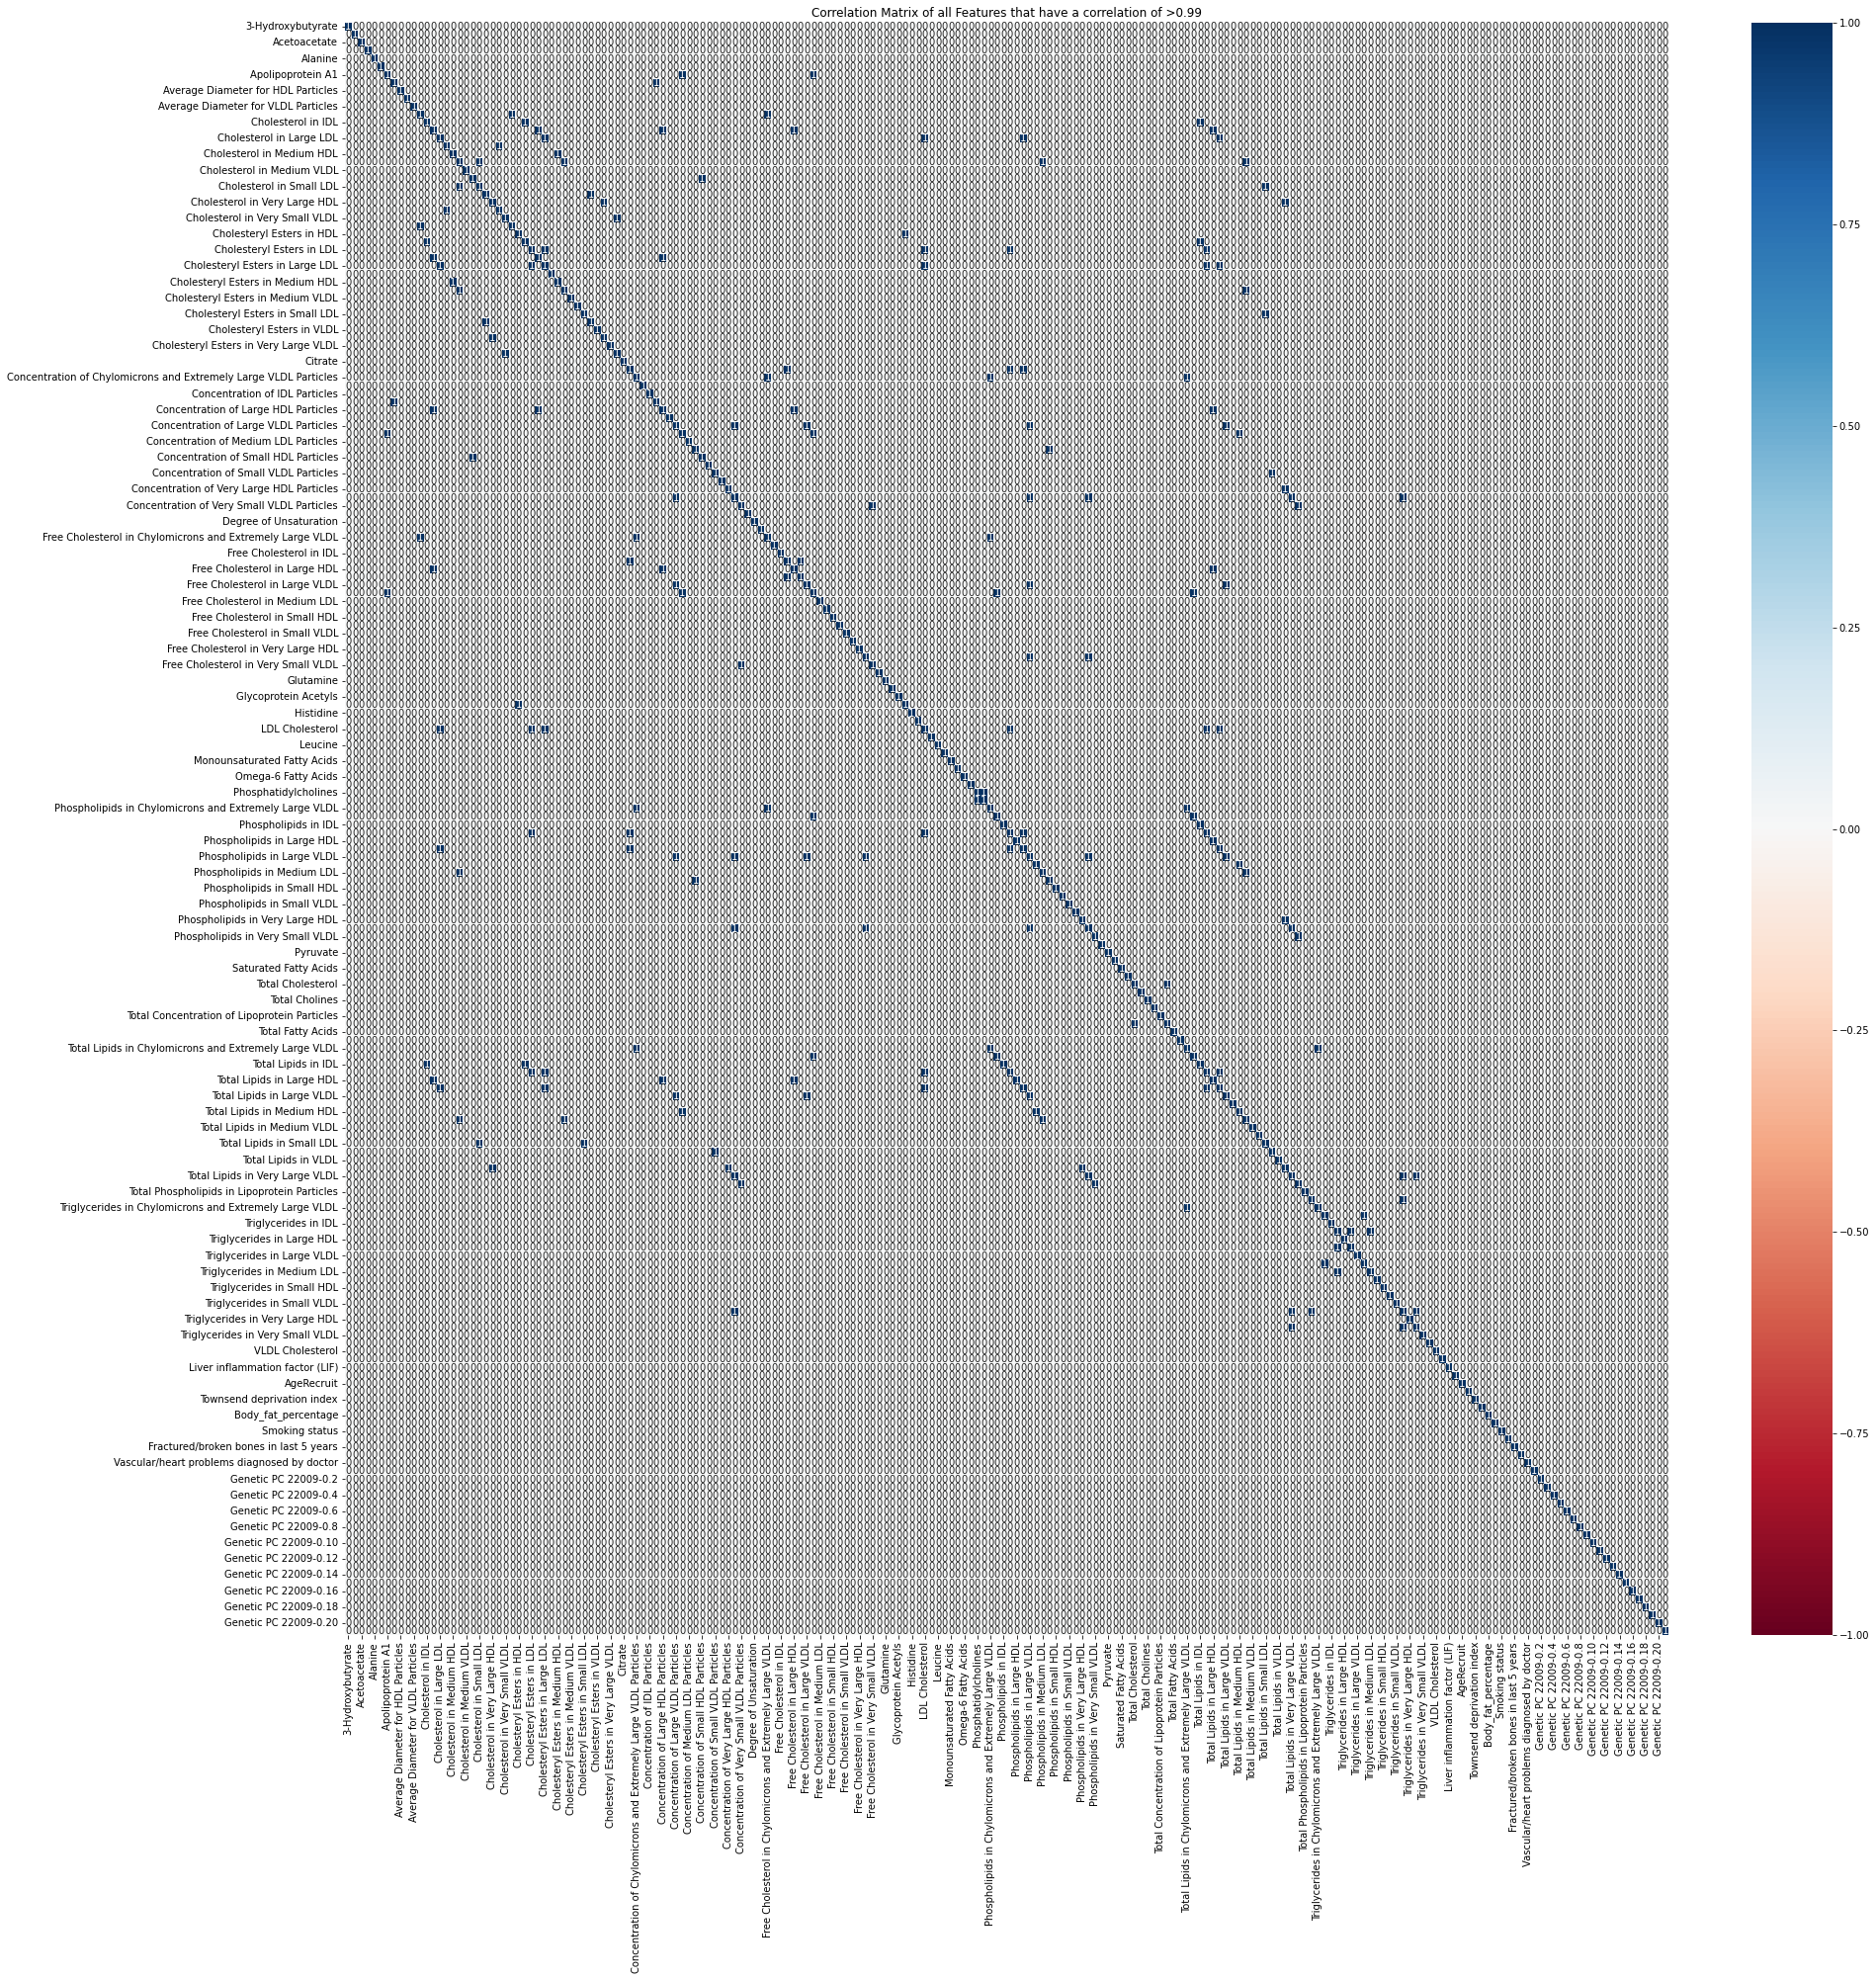

In [31]:
plt.figure(figsize = (30,30))
sns.heatmap(df[features].corr()>0.99,annot = True, cmap = "RdBu",vmin = -1,vmax = 1)
plt.title("Correlation Matrix of all Features that have a correlation of >0.99")

This shows, that we have a lot of collinearity in our data. we have to adjust for that when we want to fit our logistic regression model since we don't have a penalized term like Lasso Regression. What we do is to find all correlation coefficients that are above 0.95 and then delete only one out of these. with that we preserve the correctness of the model without having to  many features.

In [32]:
matrix = df[features].corr()
subset_to_drop = list()
for column in matrix.columns:
    for row in matrix.index:
        if row != column:
            if matrix[row][column] >= 0.95: #benchmark set manually
                subset_to_drop.append(list((row,column)))
#all features that can be dropped. but since we iterate over both halfs of the diagonal we will get a row,colum and colum,row pair that would be switched identical so we have to adjust for that



In [33]:
for i,liste in enumerate(subset_to_drop):
    subset_to_drop[i]=sorted(liste)
subset_to_drop = sorted(subset_to_drop) #gives me a list with all duplicates sorted


subset_to_drop1 = subset_to_drop[::2] #removal of the duplicates
dropable = list()
for i in range(0,len(subset_to_drop1)):
    dropable.append(subset_to_drop1[i][0]) #gives me only the row of all features that I want to keep. 
dropable = list(set(dropable))


In [34]:
df_processed = df[features].copy()

In [35]:
df_processed.drop(columns=dropable,inplace = True)


Text(0.5, 1.0, 'Correlation Matrix of all relevant Features')

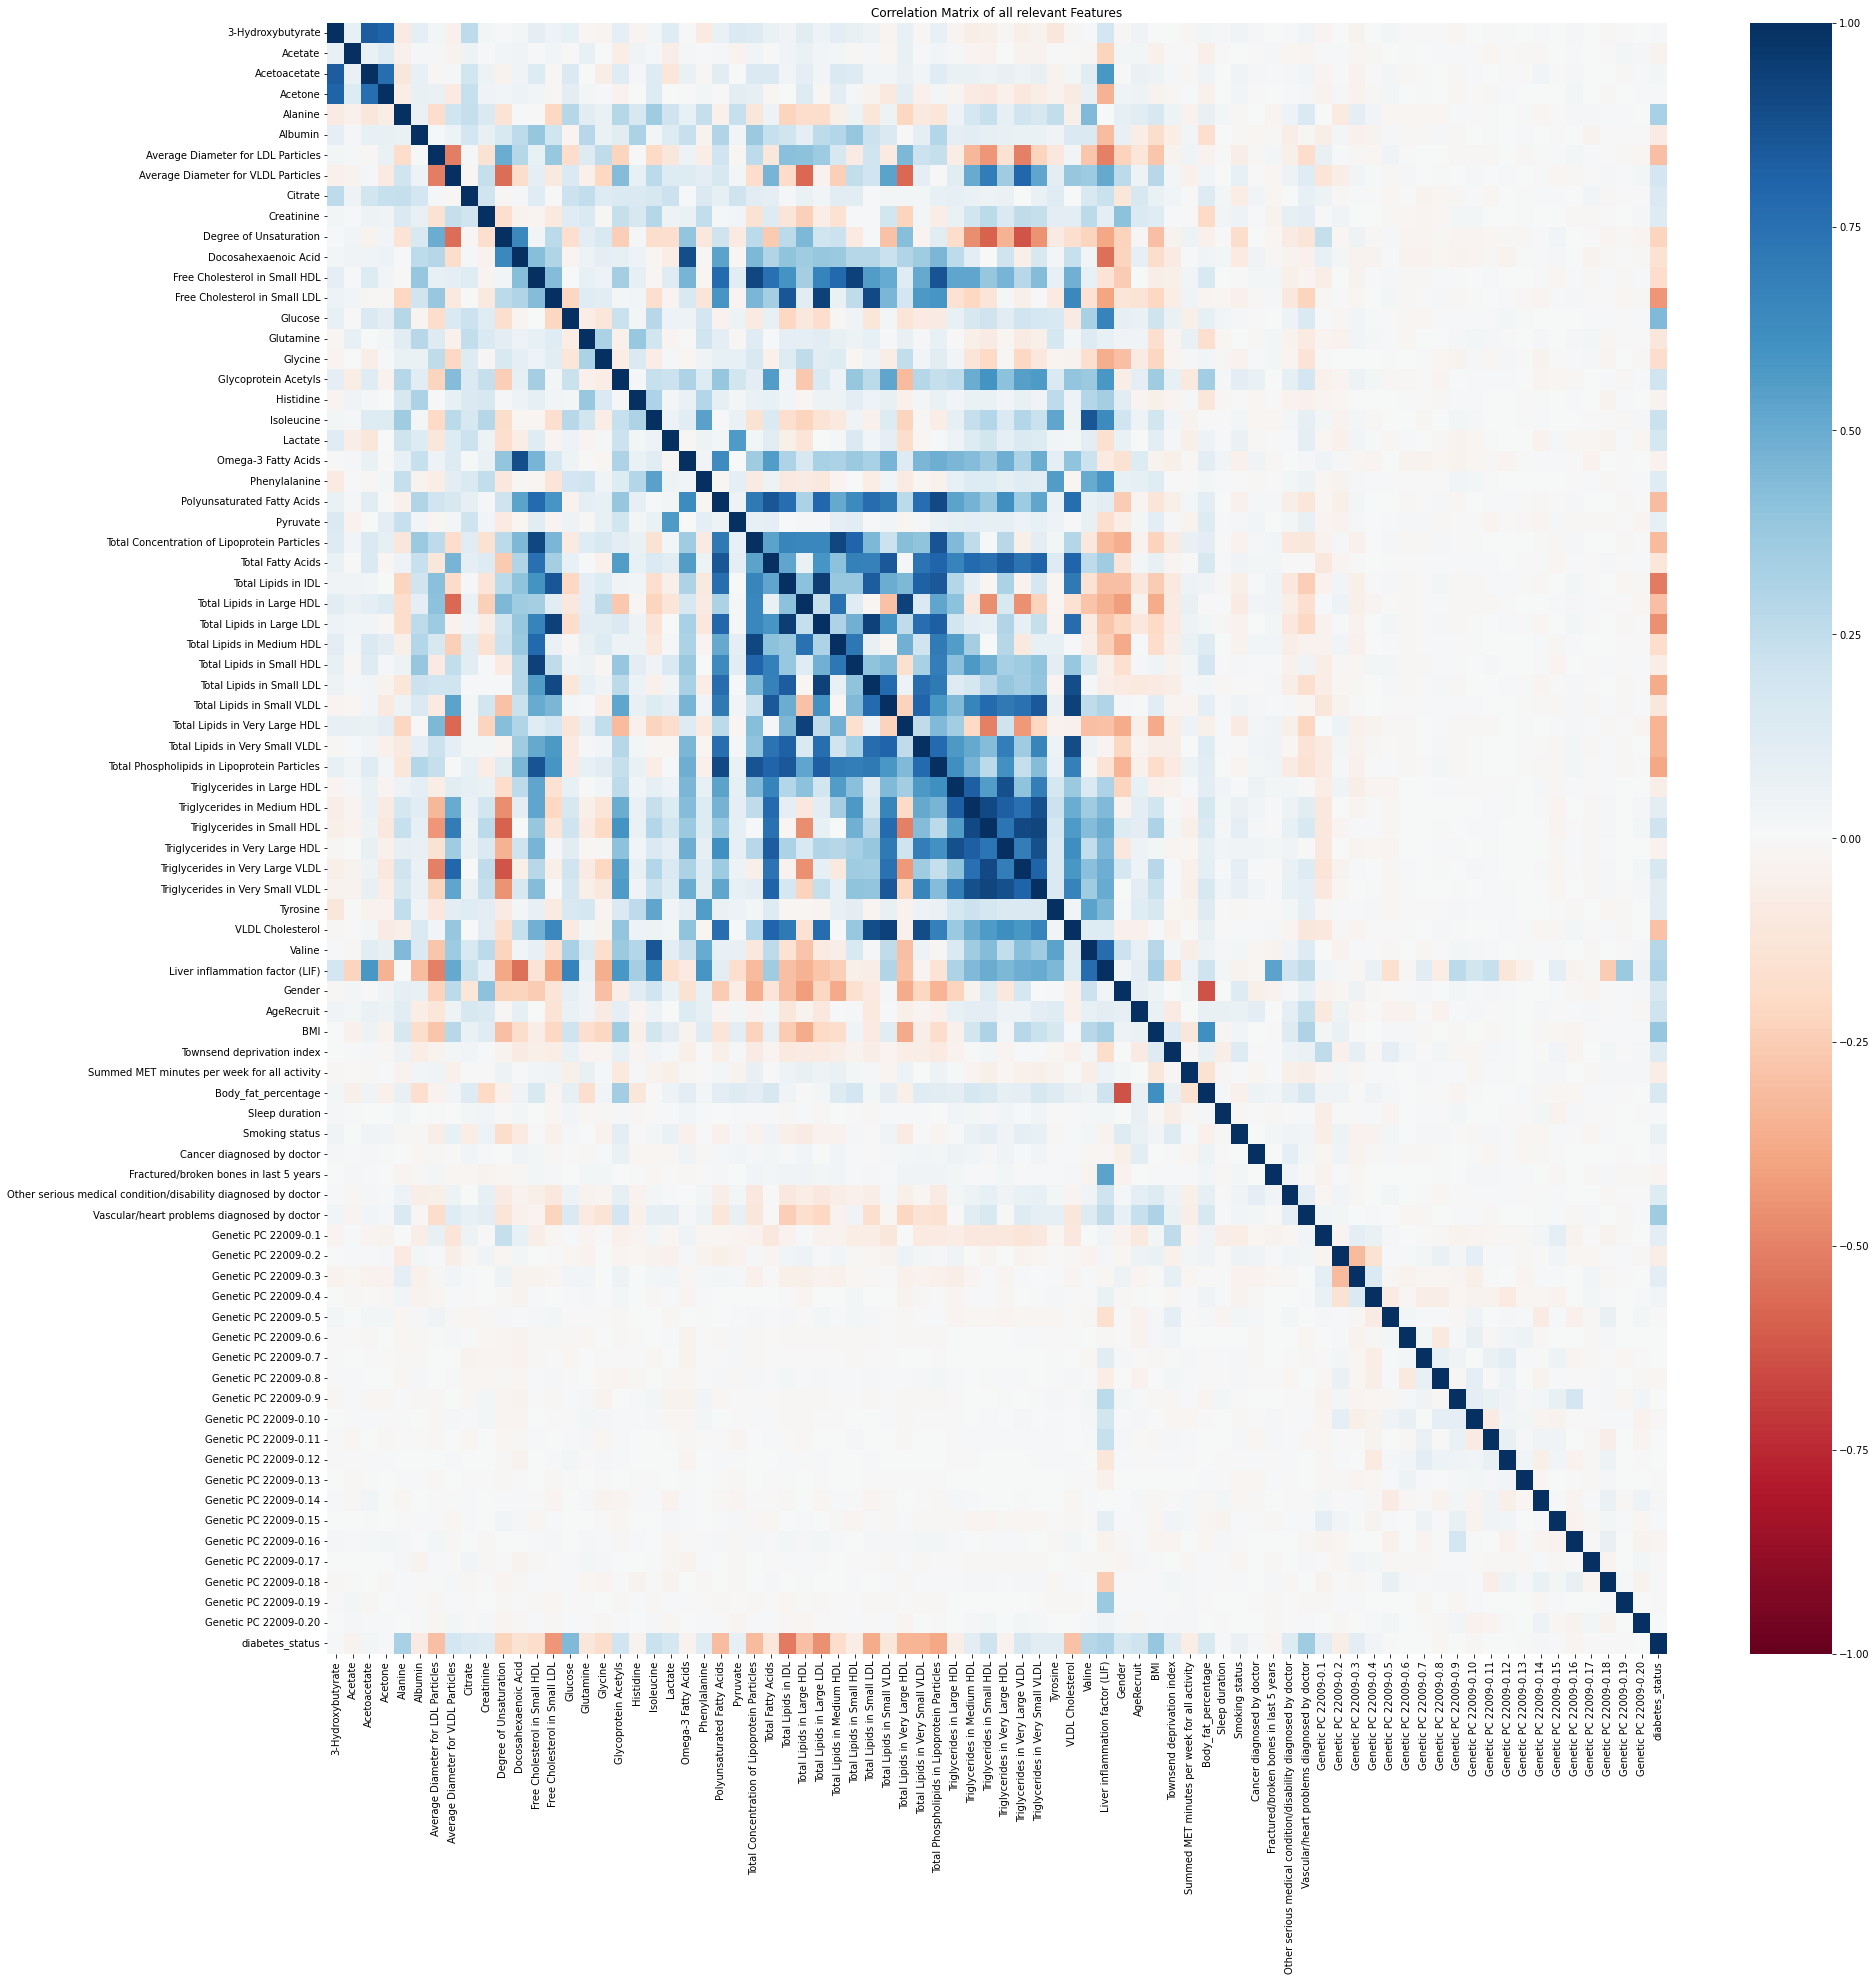

In [36]:
plt.figure(figsize = (30,30))
sns.heatmap(df_processed.corr(),annot = False, cmap = "RdBu",vmin = -1,vmax = 1)
plt.title("Correlation Matrix of all relevant Features")

For us, the last row or column is interesting since it shows us how the correlation is for all relevant features and diabetes status furthermore there seems to exist some high correlation between other features!

Text(266.0, 0.5, 'Entries of missing values')

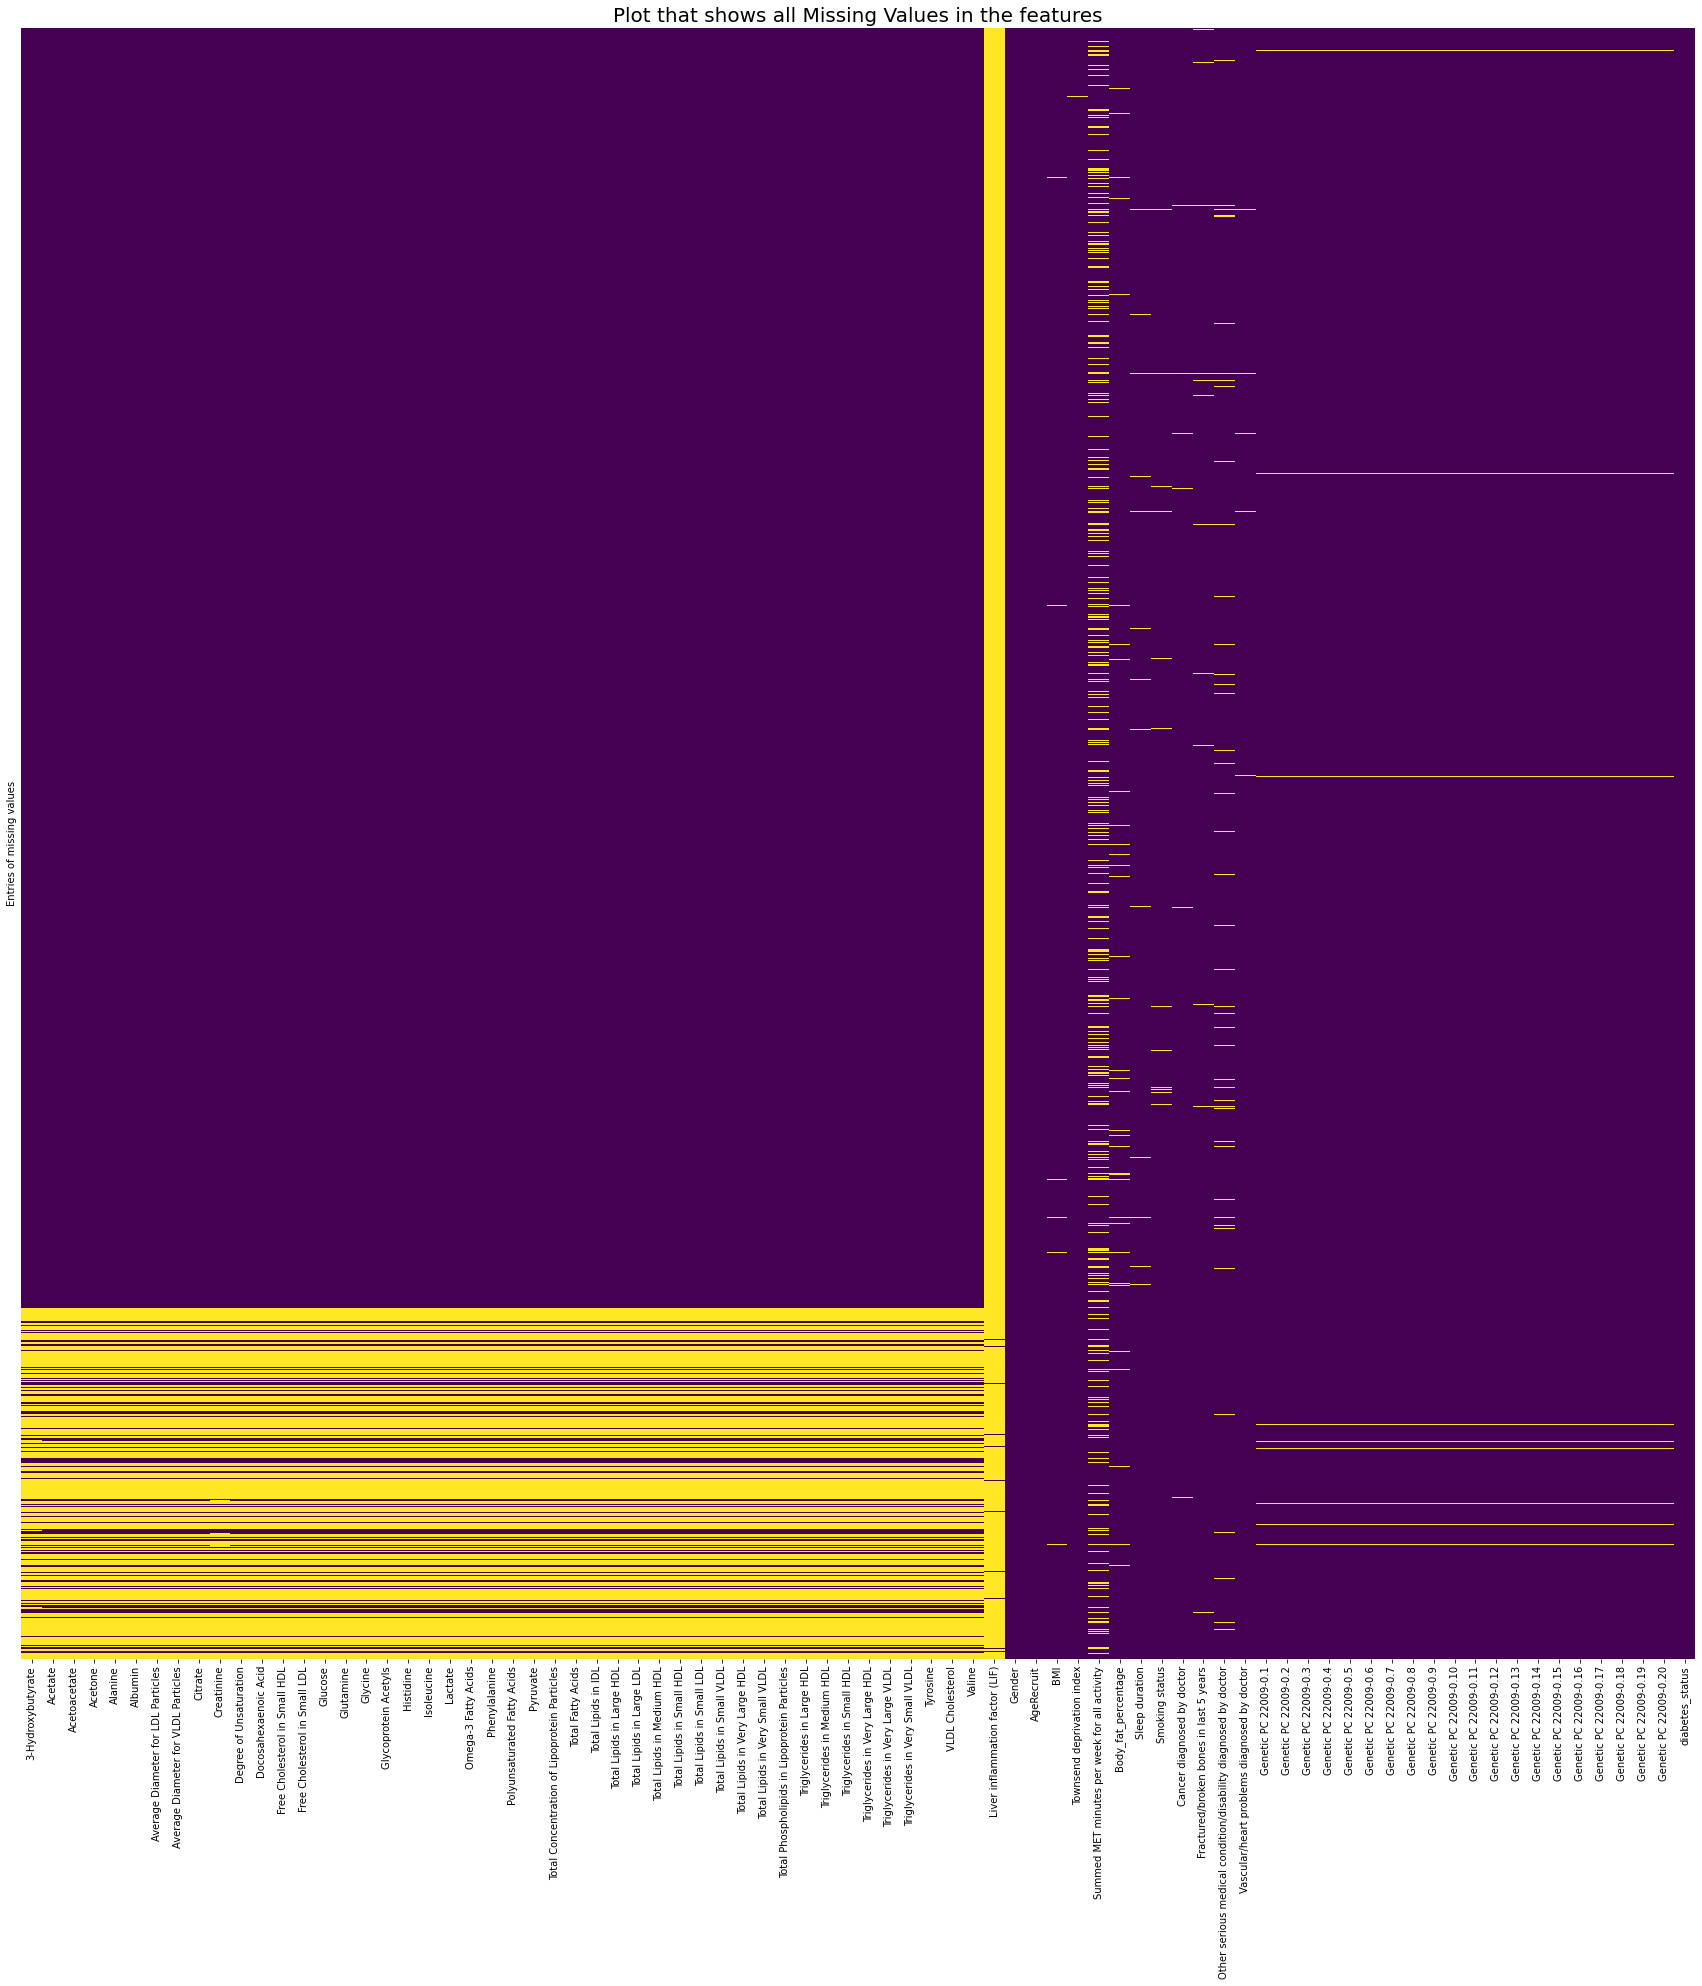

In [37]:
#visualize Missing values

plt.figure(figsize=(30,30))
sns.heatmap(df_processed.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Plot that shows all Missing Values in the features",fontsize = 20)
plt.ylabel("Entries of missing values")


In [38]:
df_processed.drop(columns = "Liver inflammation factor (LIF)",inplace = True) #delete it since its almost missing everywhere

In [39]:
subset_of_na = list()
for column in df_processed.columns:
    if df_processed[column].isna().sum()> 0:
        print("Amount of Missing Values: {} in {}".format(df_processed[column].isna().sum(),column))
        subset_of_na.append(column)


Amount of Missing Values: 1672 in 3-Hydroxybutyrate
Amount of Missing Values: 1660 in Acetate
Amount of Missing Values: 1660 in Acetoacetate
Amount of Missing Values: 1660 in Acetone
Amount of Missing Values: 1660 in Alanine
Amount of Missing Values: 1661 in Albumin
Amount of Missing Values: 1660 in Average Diameter for LDL Particles
Amount of Missing Values: 1660 in Average Diameter for VLDL Particles
Amount of Missing Values: 1660 in Citrate
Amount of Missing Values: 1684 in Creatinine
Amount of Missing Values: 1661 in Degree of Unsaturation
Amount of Missing Values: 1661 in Docosahexaenoic Acid
Amount of Missing Values: 1660 in Free Cholesterol in Small HDL
Amount of Missing Values: 1660 in Free Cholesterol in Small LDL
Amount of Missing Values: 1662 in Glucose
Amount of Missing Values: 1662 in Glutamine
Amount of Missing Values: 1661 in Glycine
Amount of Missing Values: 1660 in Glycoprotein Acetyls
Amount of Missing Values: 1662 in Histidine
Amount of Missing Values: 1660 in Isoleu

In [40]:
df_processed.dropna(subset=subset_of_na,inplace = True)


([<matplotlib.axis.XTick at 0x1e79d4767d0>,
 [Text(0, 0, 'no'), Text(1, 0, 'yes')])

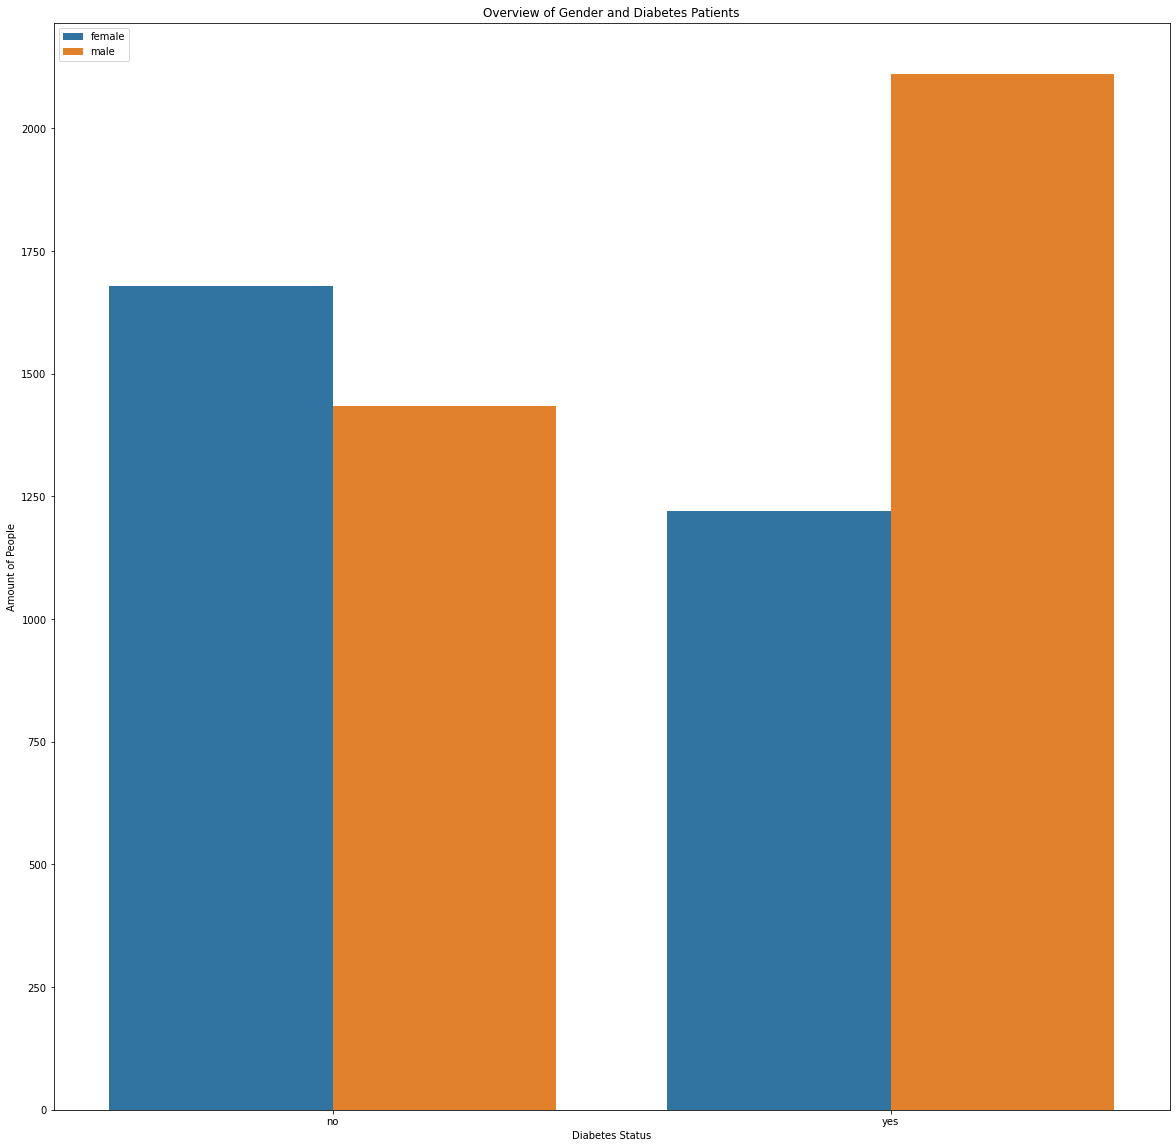

In [41]:

plt.figure(figsize=(20,20))
sns.countplot(x='diabetes_status',hue = 'Gender',data = df_processed)
plt.title("Overview of Gender and Diabetes Patients")
plt.xlabel("Diabetes Status")
plt.ylabel("Amount of People")
plt.legend(["female","male"],loc = 2)
plt.xticks(ticks=[0,1],labels=["no","yes"])

What is interesting is the slight imbalance in people that have diabetes regarding gender --> maybe gender can play a role or data is skewed.

Text(0.5, 1.0, 'Age Distribution of Males and Females')

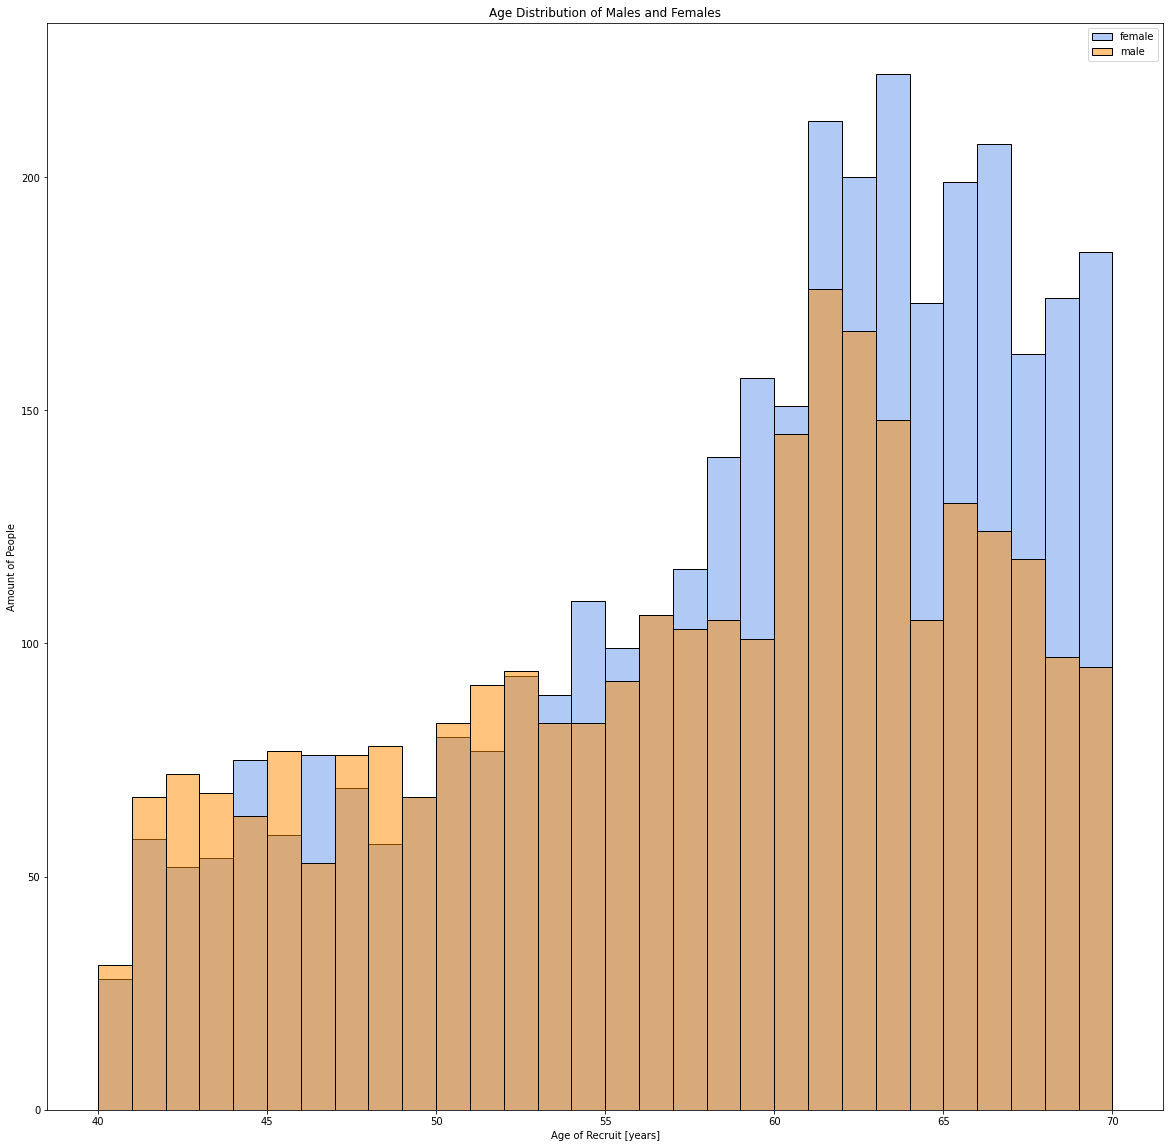

In [42]:
plt.figure(figsize=(20,20))

sns.histplot(df_processed['AgeRecruit'][df_processed["Gender"]==1],alpha = 0.5,color="cornflowerblue",bins = 30)
sns.histplot(df_processed['AgeRecruit'][df_processed["Gender"]==0],alpha= 0.5,color="darkorange",bins = 30)
plt.legend(["female","male"])
plt.xlabel("Age of Recruit [years]")
plt.ylabel("Amount of People")
plt.title("Age Distribution of Males and Females")

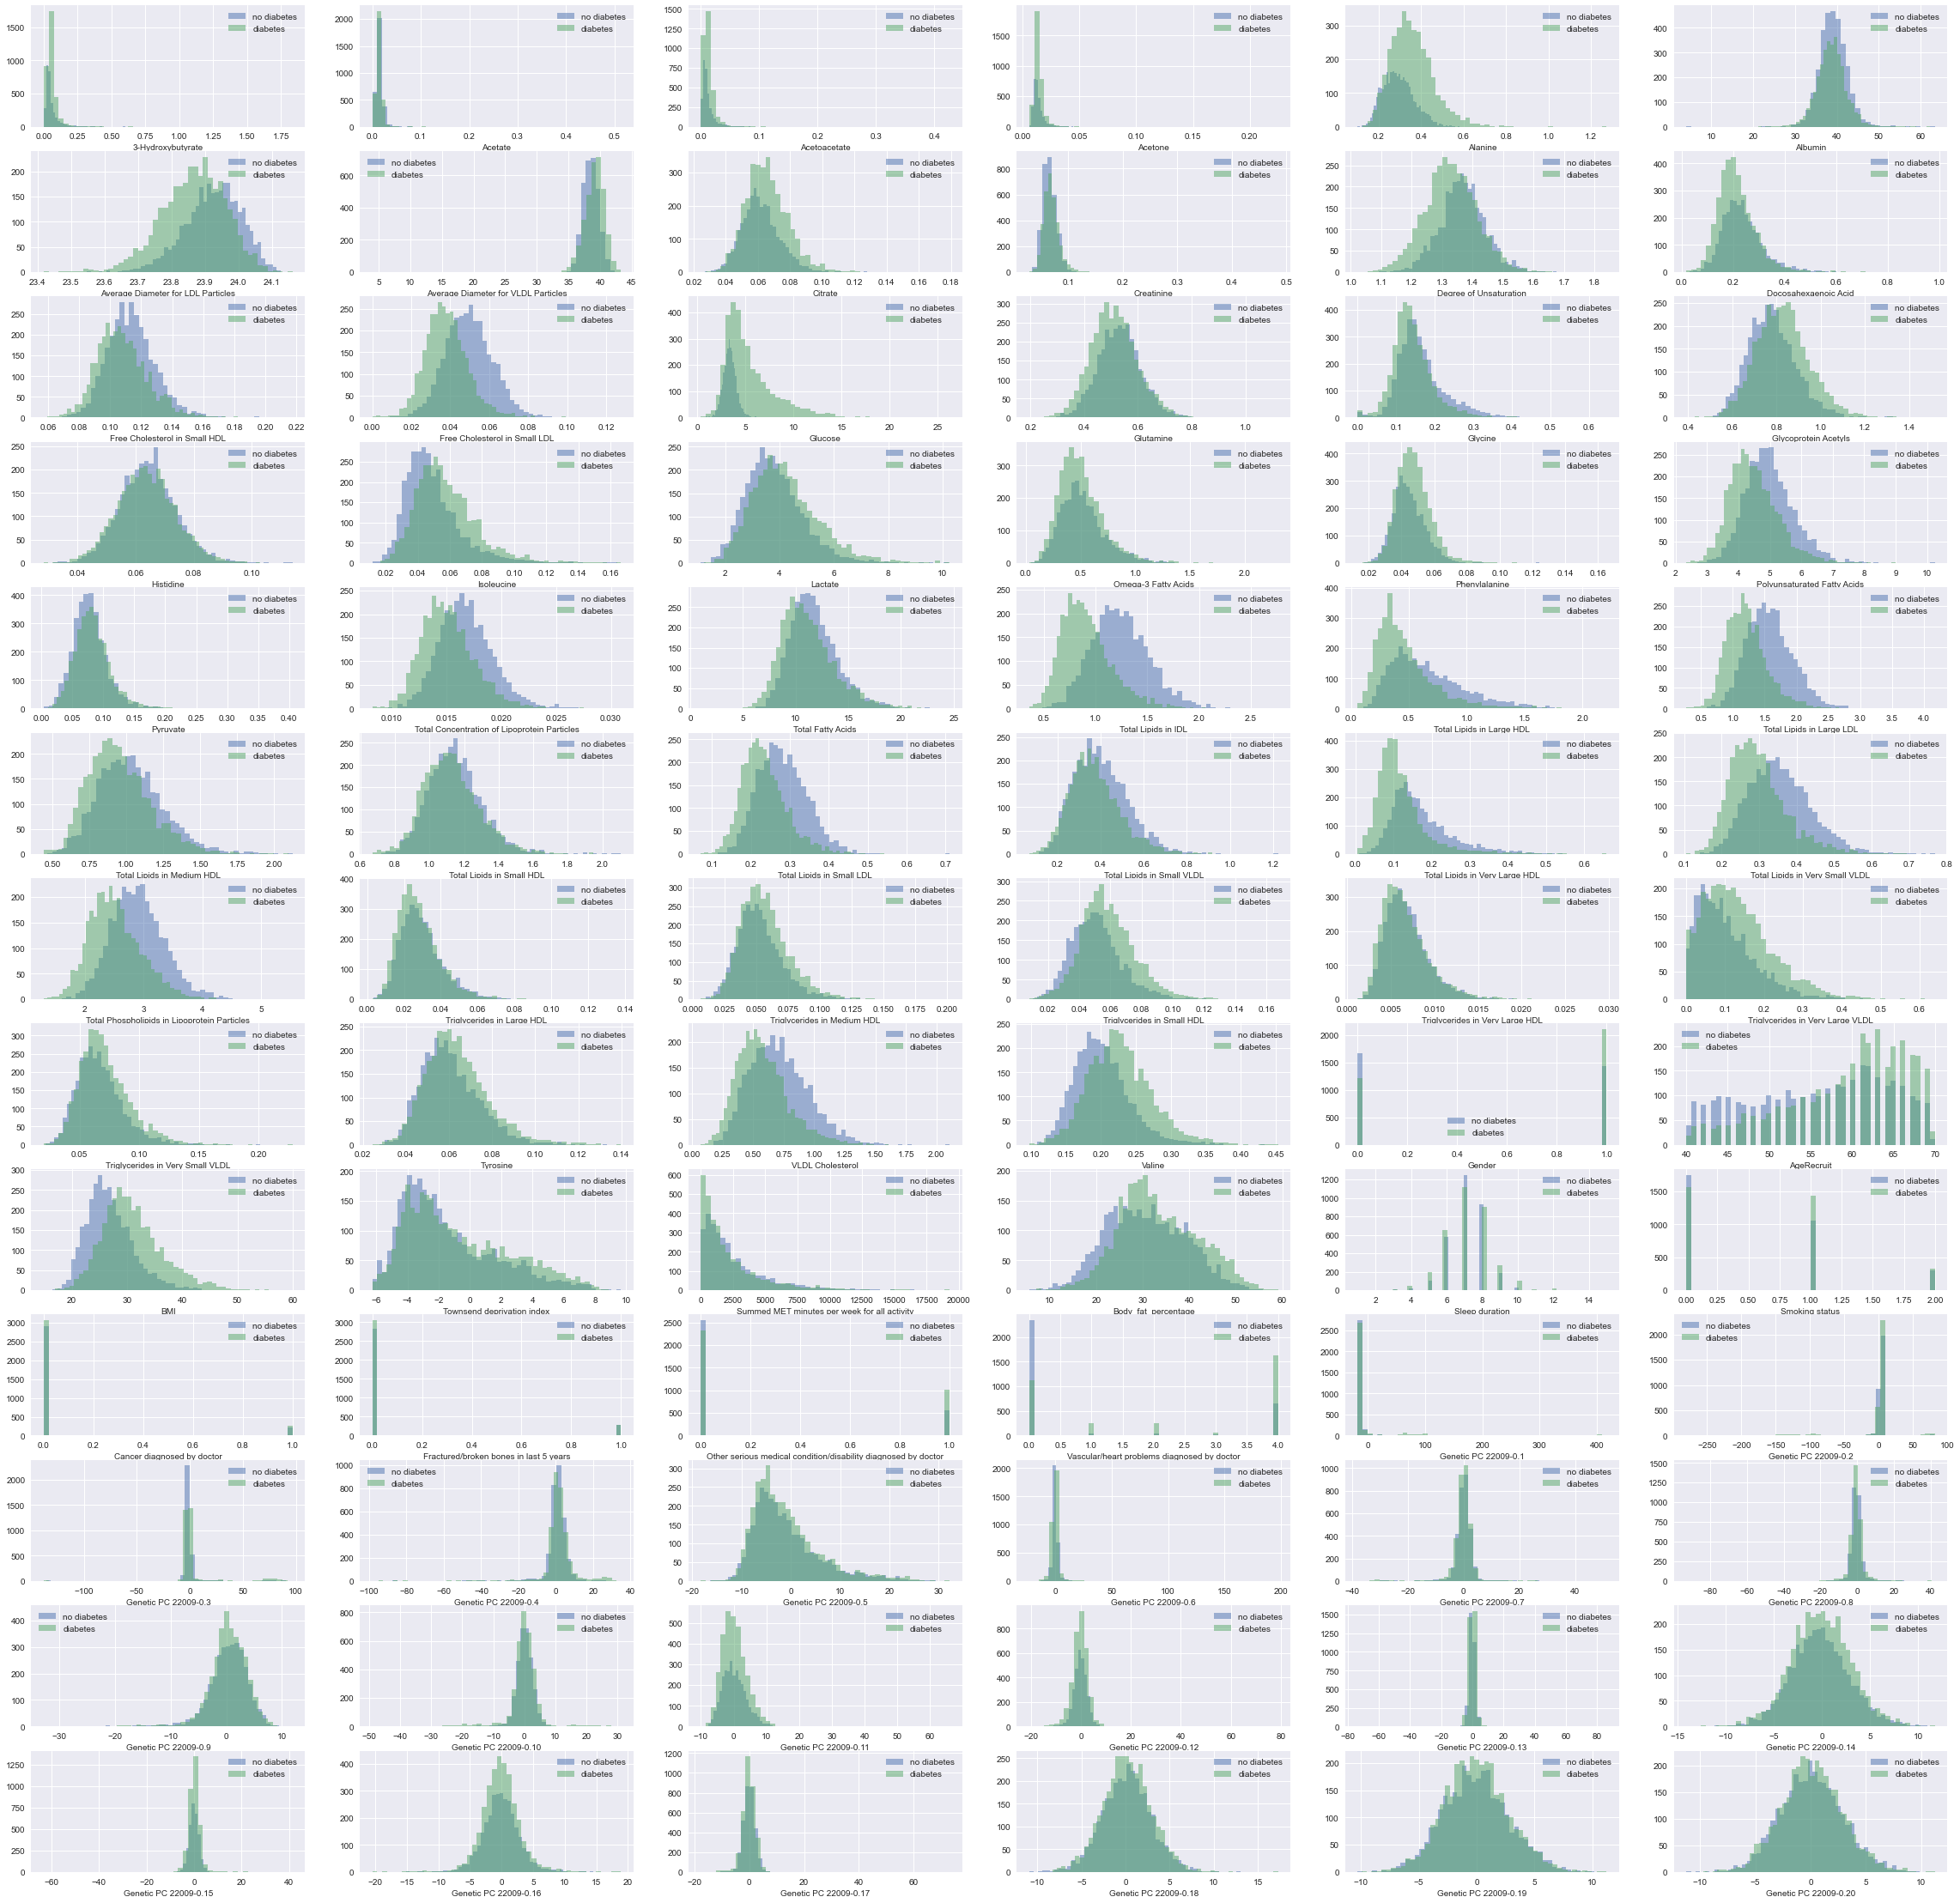

In [43]:
plt.style.use("seaborn")
features = df_processed.columns[:-1]
plt.figure(figsize = (40,40))
i=1
no = df_processed['diabetes_status'] == 0
yes = df_processed['diabetes_status'] == 1
for feature in df_processed.columns:
    if i < 79:
        plt.subplot(13,6, i)
        plt.hist(x=feature, data = df_processed[no], label = 'no diabetes', bins = 50, alpha = 0.5)
        plt.hist(x=feature, data = df_processed[yes], label = 'diabetes', bins = 50, alpha = 0.5)
        i = i+1
        plt.xlabel(feature,fontsize = 10)
        #plt.ylabel("count") having this in is more distracting for completness we can uncomment it
        plt.legend()
plt.show()
plt.close()

Here we already can see that some features are indicative to develope diabetes or not. for example there are some clear right shifts in row 5 & 6 that show that there might exist a correlation between those. Also we see that with increasing Age the number of diabetes patients increases!.
Fruthermore, we see that our scales are all over the place, For clustering etc its necessarry to standardize our data since the algorithms mostly work with distance functions ( metrics) and hence scales that are very large would dominate our clustering!

In [44]:
#standardize everthing so we can see wheter or not we have non linear relationship in our data. if thats the case PCA won't be the solution.
def standardize(x):
    return (x - np.mean(x))/np.std(x)
df_stand = df_processed.copy()
for column in df_stand.columns:
    df_stand[column] = standardize(df_stand[column])

df_stand


,3-Hydroxybutyrate,Acetate,Acetoacetate,Acetone,Alanine,Albumin,Average Diameter for LDL Particles,Average Diameter for VLDL Particles,Citrate,Creatinine,...,Genetic PC 22009-0.12,Genetic PC 22009-0.13,Genetic PC 22009-0.14,Genetic PC 22009-0.15,Genetic PC 22009-0.16,Genetic PC 22009-0.17,Genetic PC 22009-0.18,Genetic PC 22009-0.19,Genetic PC 22009-0.20,diabetes_status
0,-0.202162,-0.068527,-0.312112,0.807464,-0.118180,0.045798,1.267503,-0.994780,1.114008,0.816442,...,0.056983,-0.724137,0.316177,0.611408,-0.433310,-1.082492,0.199330,1.731246,0.574017,-1.034267
1,-0.728348,-0.864552,-0.688557,-0.829513,-1.343878,-0.765590,0.888096,-0.025892,-1.725996,-0.602632,...,0.233873,-0.085655,-1.022044,-0.224531,-0.307970,0.593500,-0.044259,-1.860007,1.610722,-1.034267
2,0.114601,0.517567,-0.064553,-0.027967,-0.546222,0.874826,0.698393,-0.404220,1.020582,-0.183144,...,-0.617232,-0.295711,-0.049164,0.435363,-0.579532,17.956729,-2.042351,-0.929906,2.884966,-1.034267
4,2.141584,0.330892,1.077558,2.438934,-0.721504,1.724673,-0.007726,-1.050145,0.905292,-1.338719,...,1.153762,0.479796,-0.087728,-0.940585,-0.635538,-0.806614,0.340879,-0.020725,2.943920,-1.034267
5,-0.318960,-0.288074,-0.135096,-0.103832,-0.280584,-0.720770,1.804996,-0.789139,0.436997,-0.612065,...,0.057680,0.056023,0.830274,-0.544429,-0.351915,-0.155711,-0.302317,-0.719284,-0.416243,-1.034267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16969,-0.632504,0.406724,0.357537,0.388199,-1.106550,-1.525797,-0.049882,0.600260,-0.529364,-0.385361,...,-0.779293,-0.416579,-0.720132,-0.095649,-1.599562,0.025236,-0.246521,1.857337,-1.183779,0.966869
17012,-0.950191,-0.367499,-0.866040,-0.550635,-0.519403,-3.167948,-0.450367,-0.680386,-1.550619,-1.248825,...,-0.682074,-0.341581,-0.210463,-0.938523,0.130513,-1.312662,0.819854,0.173368,1.025567,0.966869
17016,-0.547937,-0.511542,-0.246664,-0.526745,-1.069089,-0.289630,0.203056,-0.242739,-1.439825,-0.928789,...,0.361166,-0.323362,0.030650,-0.193474,0.678682,0.148591,0.155368,-1.459697,0.407280,0.966869
17042,-0.342709,0.410699,0.043012,0.436891,-0.020056,-0.445199,-0.945704,-0.012710,0.338609,-0.027406,...,0.335468,-0.036050,1.338116,-0.158133,0.426947,-0.138741,-1.693702,-0.653835,0.207969,0.966869


standardization worked just fine.

Lastly lets see if there is a pairwise correlation that is not linear and hence not observable on the heatmap this took too long to run and presumably there will be way to many pairs eg 79^2 so this will be commented out, for smaller datasets this could be a good visualization

In [45]:

#sns.pairplot(data = df_stand, plot_kws={"s":3},hue = 'diabetes_status')

## Part 2 Clustering 

In [46]:
#get out relevant data. that is already standardized
X = df_stand.copy()
#we will look wheter or not we can archive a good seperation cluster without diabetes status. Here k-menas would be a good start since we can specify that our numbers of clusters are two since we know some
#people have diabetes and some don't
#However Hirarchial Clustering would be also of great interest to see if we can figure out some subtypes of diabetes (eg. Type 1 or Type 2=) Diabetes.
X.drop(columns=['diabetes_status'],inplace = True)
X2 = X.copy() #used for out silhouette visualization
features = X.copy() #used for hist subplots


### k-means clustering

In [47]:
import sklearn
from sklearn import cluster

naively it would make sense to check for 2 clusters since we have diabetes status 1 and 0 as our target variable
Maybe for the subtype we look at the inertias to find out wheter or not there are more clusters.

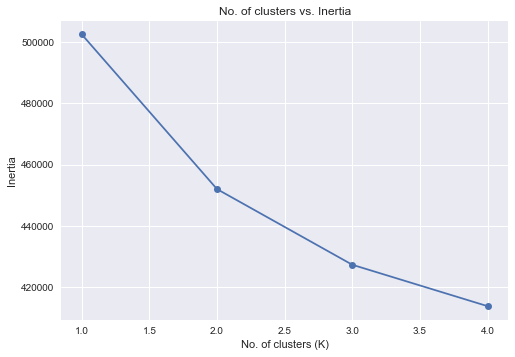

In [48]:
options = range(1,5)
inertias = []

for n_clusters in options:
    model = cluster.KMeans(n_clusters, random_state=2022).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');
     

No of cluster = 2 gives best drop in intertia! so we choose it.

In [49]:
model = cluster.KMeans(n_clusters=2,random_state=2022).fit(X)
X['Cluster']=model.labels_

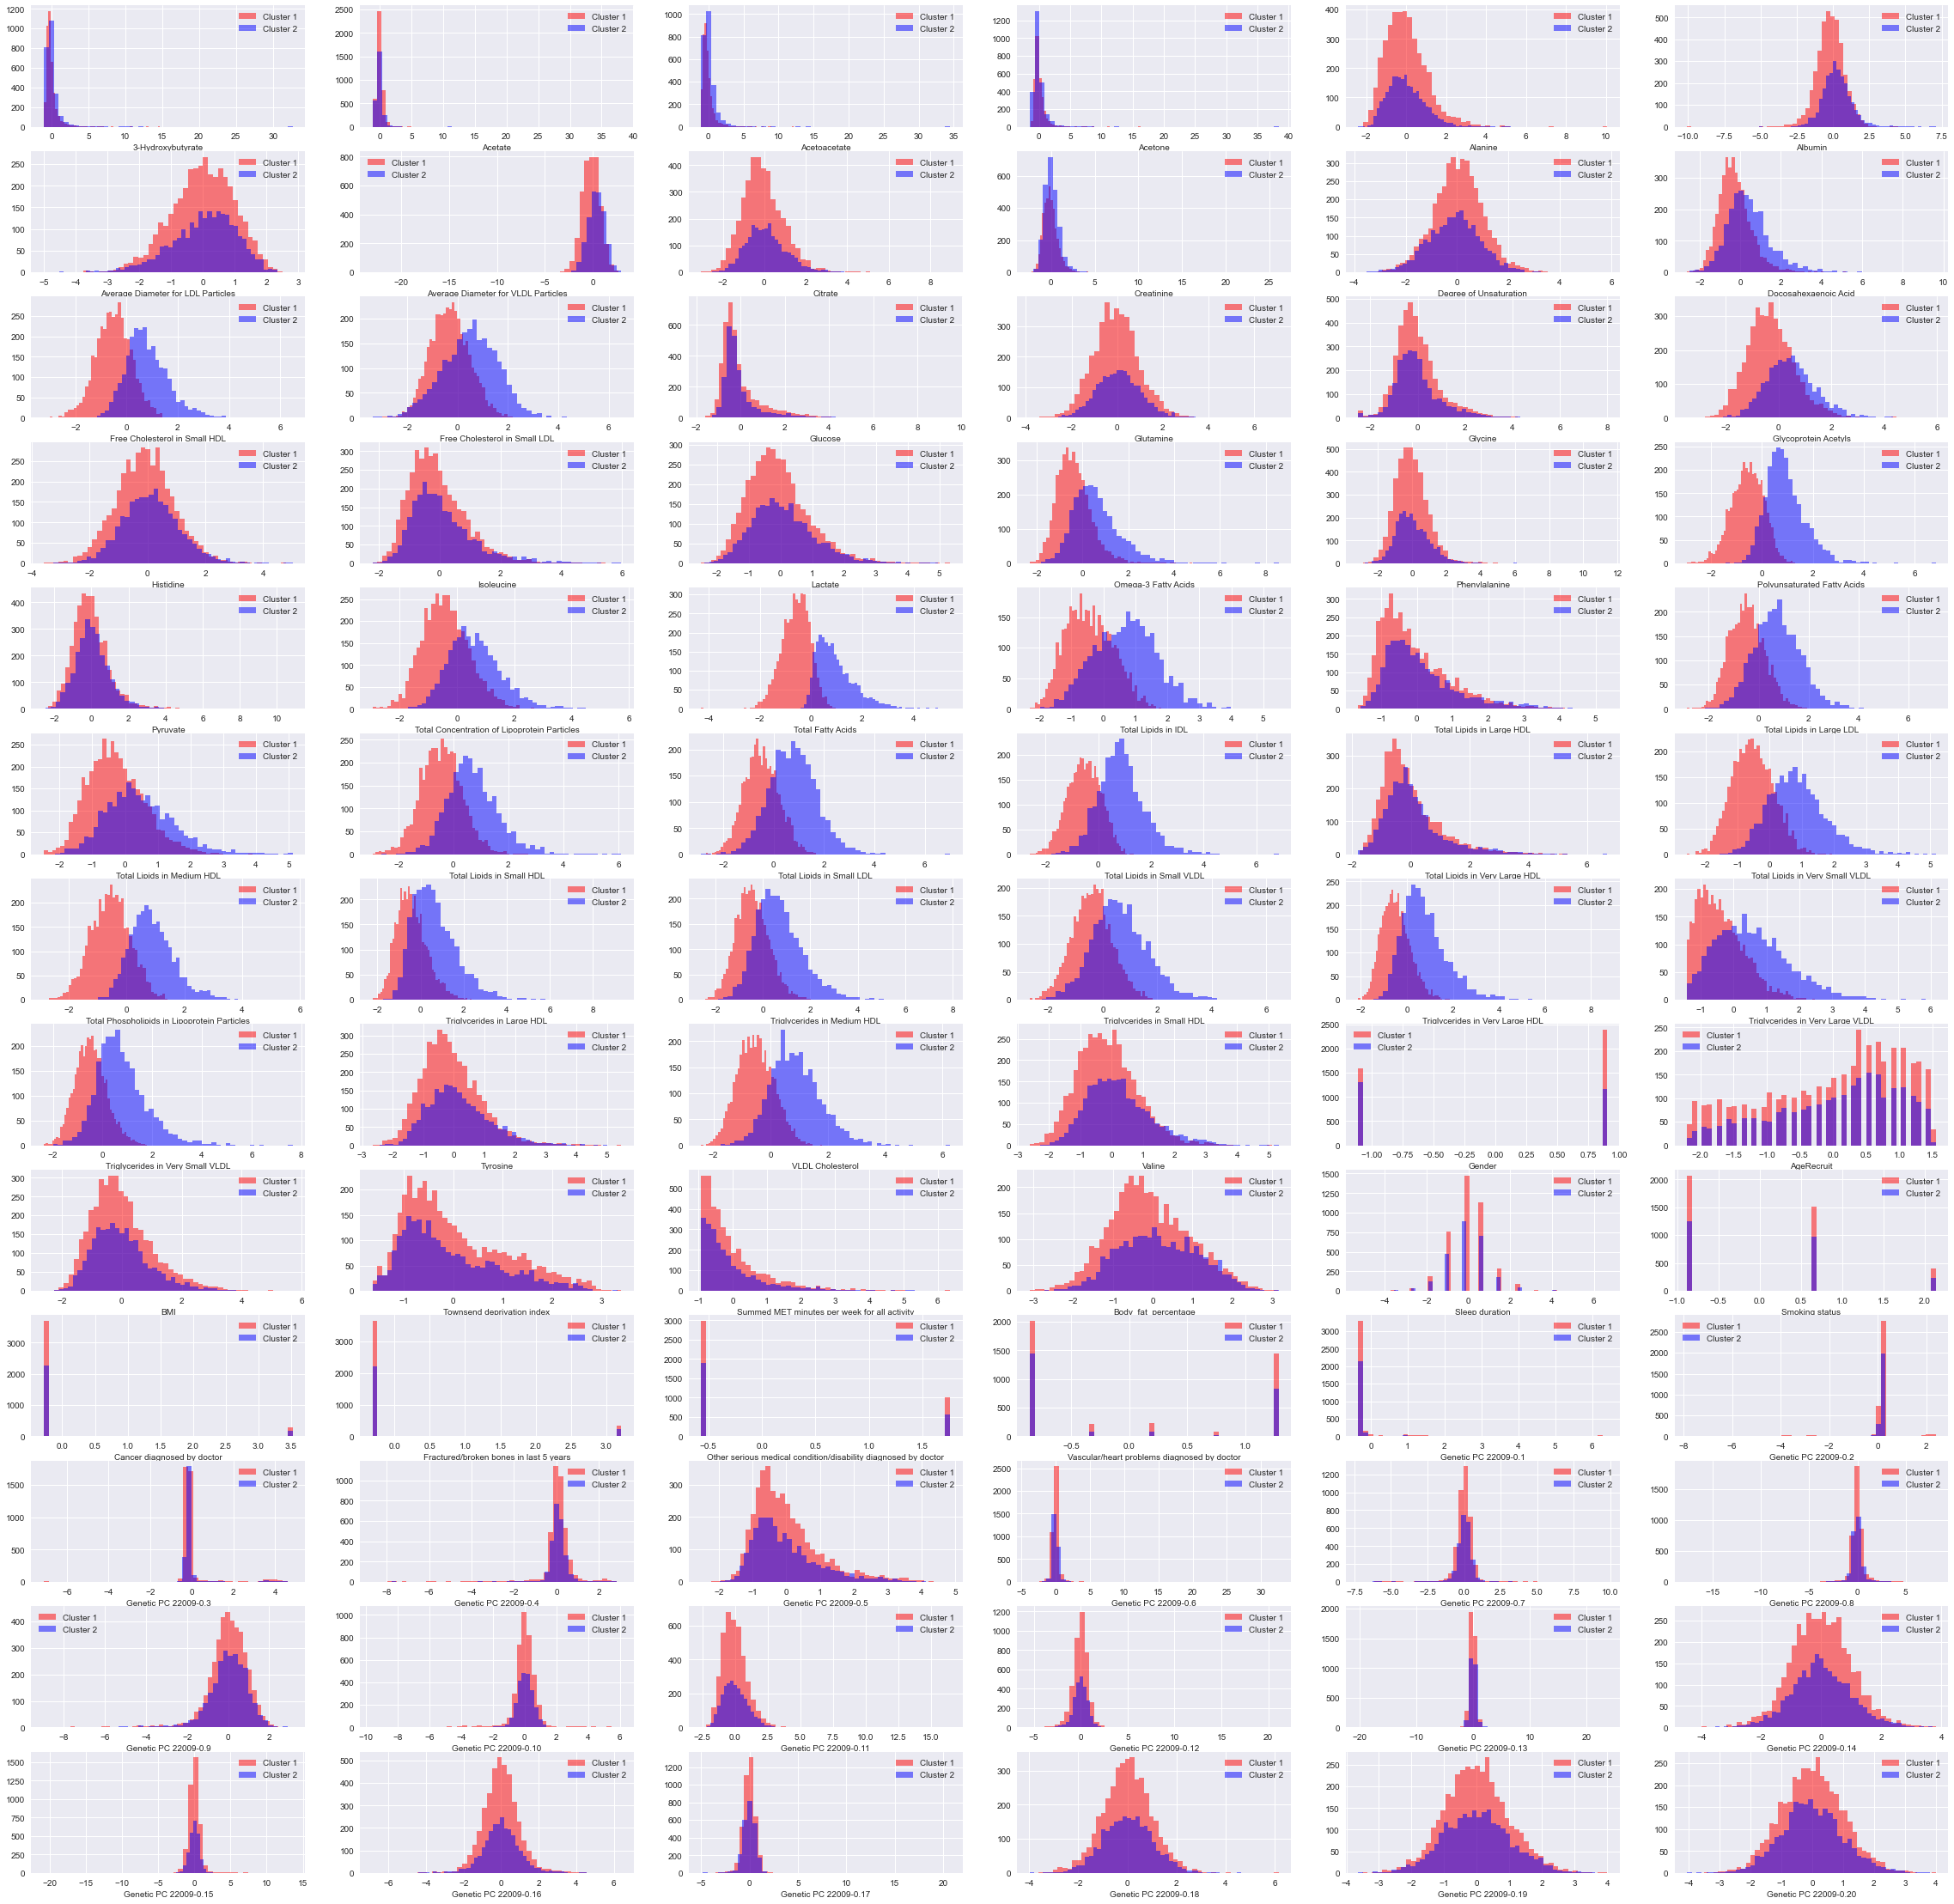

In [50]:

features = X.columns[:-1]
plt.figure(figsize = (40,40))
i=1
no = X['Cluster'] == 1
yes = X['Cluster'] == 0
for feature in df_processed.columns:
    if i < 79:
        plt.subplot(13,6, i)
        plt.hist(x=feature, data = X[no], label = 'Cluster 1', bins = 50, alpha = 0.5,color = "red")
        plt.hist(x=feature, data = X[yes], label = 'Cluster 2', bins = 50, alpha = 0.5 ,color ="blue")
        i = i+1
        plt.xlabel(feature,fontsize = 10)
        plt.legend()
plt.show()
plt.close()

The seperation with two clusters is really good. we can see that cluster 1 = no diabetes more or less.

Another good visualization to make a decision for what k we are going to use is the Silhouette score. It is used to evaluate the quality of our clusters
S-Score = (b - a) / max(a,b)
with b = mean intra cluster distance a = mean nearest-cluster distance

we have to install yellowbrick api

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer

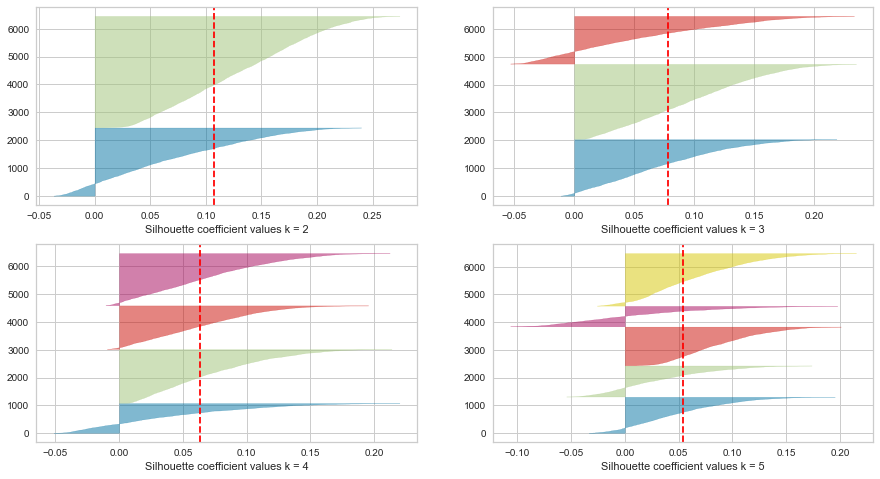

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = cluster.KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X2)
    ax[q-1][mod].set_xlabel("Silhouette coefficient values k = {}".format(i))
    

we see that for all clusters we get sometimes a negative score wich means some points may be in the wrong clustern with the range of the silhouette score [-1,1] we see that our clustering isn't the best but out of all numbers of clusters it looks like that k = 2 looks reasonable since it has the highest average score and not too many negative scores.

In [53]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
     

### Hierachial Clustering

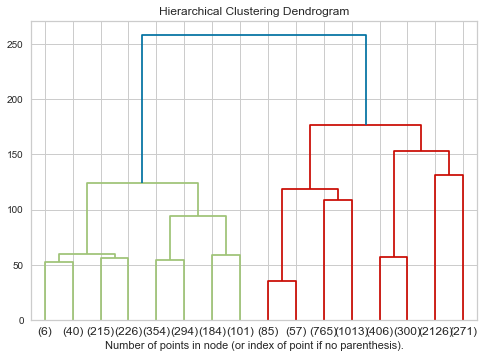

In [54]:
#Hirarchical Cluster that will converge to two specified by n_clusters, compute distance is here for visualization
model = cluster.AgglomerativeClustering(n_clusters=2,compute_distances=True)
model = model.fit(X2)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

we can see that alsowith our Hierarchical Clustering Dedrogram we will have two clusters at the top, however there exist some subtypes, they aren0t too distinct to actually think more clusters are possible


## Classification

Our target varibale is binary, hence it would make sense to fit a logistic regression model to see what contributes to diabetes, Alternatively a LDA would make sense however we got way too many dimensions that would impact our runtime imensly since complexity is O(n^3) when we have a datapoint with dim(n)

In [55]:

from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc, precision_recall_curve

In [56]:
def compute_metrics(y_true, y_pred):
    """ gives me all necerssary metrics that one needs to evaluate or prediction """
    print('Accuracy: {0:.3f}'.format(accuracy_score(y_true, y_pred)))
    print('Recall: {0:.3f}'.format(recall_score(y_true,y_pred)))
    print('Precision: {0:.3f}'.format(precision_score(y_true,y_pred)))
    


### Selecting the models

Model Scores of KNeighborsClassifier on Train Data  
Accuracy: 0.86
Recall 0.81
Precision 0.90


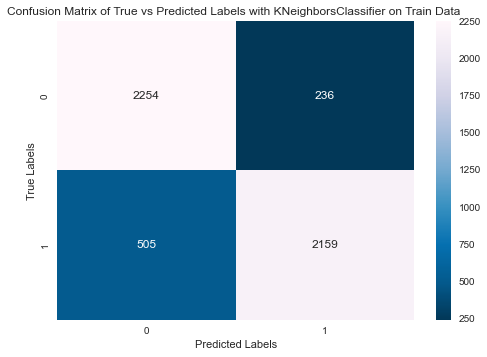

Model scores on Test Data: KNeighborsClassifier
Accuracy: 0.811
Recall: 0.755
Precision: 0.863



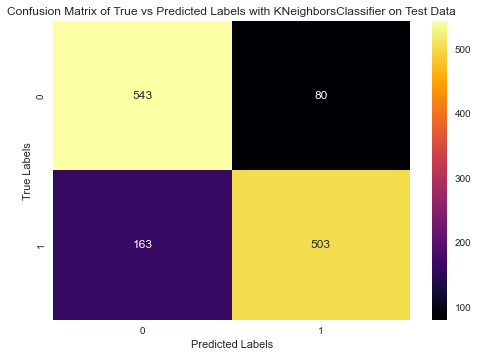

Model Scores of SVC on Train Data  
Accuracy: 0.92
Recall 0.91
Precision 0.94


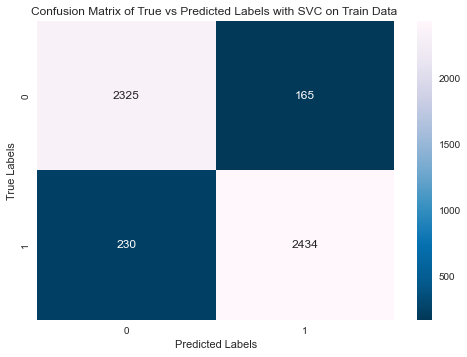

Model scores on Test Data: SVC
Accuracy: 0.861
Recall: 0.844
Precision: 0.882



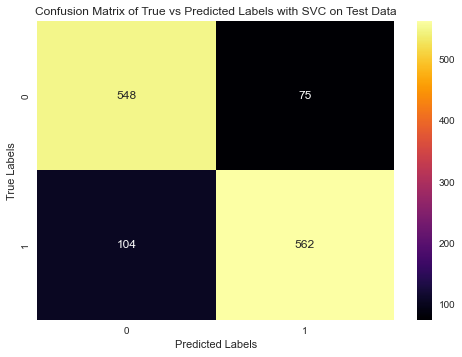

Model Scores of DecisionTreeClassifier on Train Data  
Accuracy: 1.00
Recall 1.00
Precision 1.00


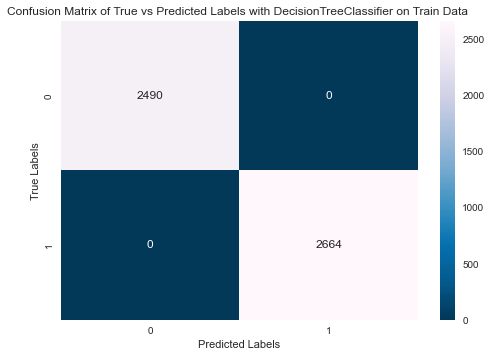

Model scores on Test Data: DecisionTreeClassifier
Accuracy: 0.811
Recall: 0.820
Precision: 0.816



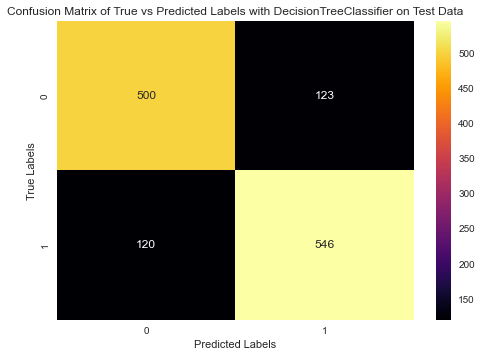

Model Scores of GaussianNB on Train Data  
Accuracy: 0.82
Recall 0.81
Precision 0.84


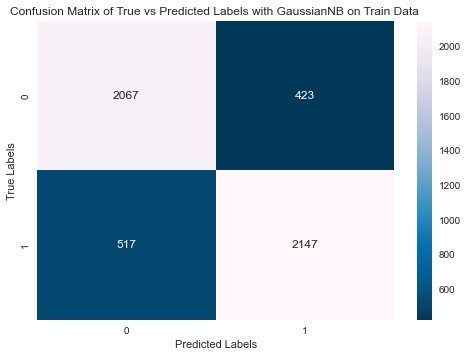

Model scores on Test Data: GaussianNB
Accuracy: 0.827
Recall: 0.818
Precision: 0.842



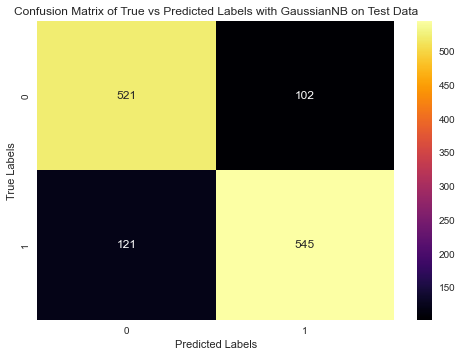

Model Scores of GradientBoostingClassifier on Train Data  
Accuracy: 0.90
Recall 0.89
Precision 0.92


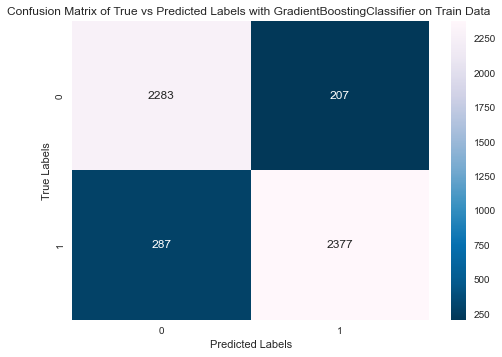

Model scores on Test Data: GradientBoostingClassifier
Accuracy: 0.873
Recall: 0.865
Precision: 0.886



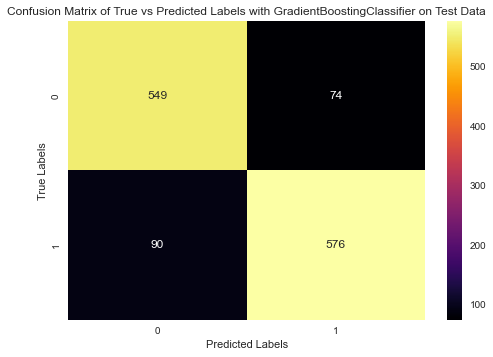

Model Scores of RandomForestClassifier on Train Data  
Accuracy: 1.00
Recall 1.00
Precision 1.00


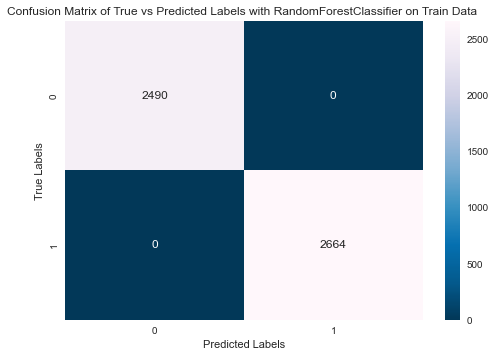

Model scores on Test Data: RandomForestClassifier
Accuracy: 0.873
Recall: 0.869
Precision: 0.883



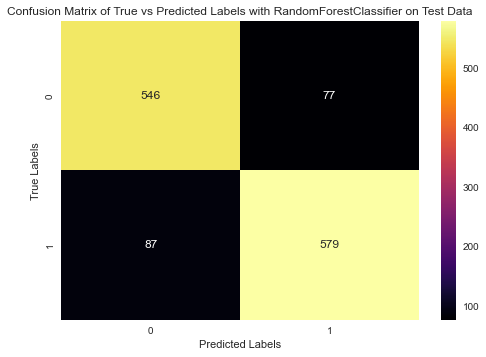

C:\Users\thoma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Scores of LogisticRegression on Train Data  
Accuracy: 0.87
Recall 0.87
Precision 0.89


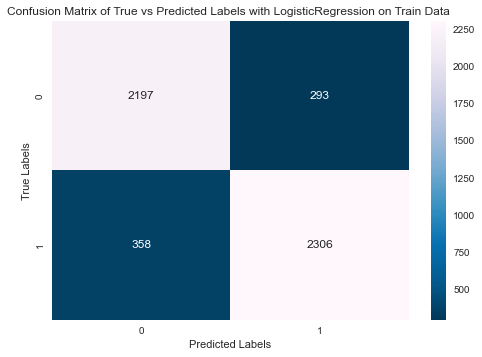

Model scores on Test Data: LogisticRegression
Accuracy: 0.877
Recall: 0.857
Precision: 0.901



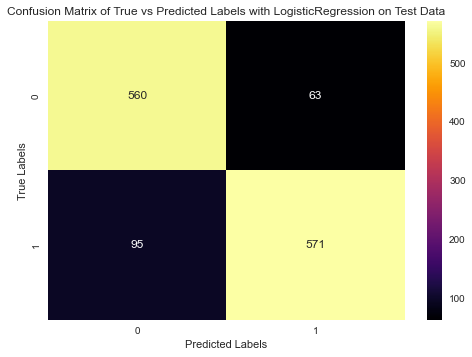

In [57]:
data = df_processed.copy()#relevant data
X = data[features]
y =data['diabetes_status']
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=2022,stratify = y) #setting training and testing set stratification is here that we have a balnced class label set!

scaler = StandardScaler()
#Standardizes our data like df_standardize, however diabetes status is preserved
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

models = [KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),GaussianNB(),GradientBoostingClassifier(),RandomForestClassifier(),LogisticRegression()] #set of all Classifier models that we iterate
scores = []
recall = []
precision = []
for model in  models:
    #training step
    model.fit(X=X_train,y=y_train)
    predictions= model.predict(X_train)
    
    # output of training step
    name= str(model)
    print("Model Scores of {} on Train Data  \nAccuracy: {:.2f}\nRecall {:.2f}\nPrecision {:.2f}".format(name[:-2],model.score(X_train,y_train),recall_score(y_train,predictions),precision_score(y_train,predictions)))
    matrix = confusion_matrix(y_train,predictions)
    sns.heatmap(matrix, annot=True, cmap='PuBu_r',fmt='d')
    plt.ylabel("True Labels");plt.xlabel("Predicted Labels")
    plt.title("Confusion Matrix of True vs Predicted Labels with {} on Train Data ".format(name[:-2]))
    plt.show()
    
    
    #prediction on test data
    preds = model.predict(X_test) #make prediction
    scores.append(accuracy_score(y_test, preds))
    recall.append(recall_score(y_test,preds))
    precision.append(precision_score(y_test,preds))
    
    #output of testing step
    name= str(model)
    print("Model scores on Test Data:",name[:-2])
    compute_metrics(y_test, preds)
    
    print("")
    cf_matrix=confusion_matrix(y_test, preds)
    sns.heatmap(cf_matrix, annot=True, cmap='inferno',fmt='d')
    plt.ylabel("True Labels");plt.xlabel("Predicted Labels")
    plt.title("Confusion Matrix of True vs Predicted Labels with {} on Test Data".format(name[:-2]))
    plt.show()
    

What is interesting is the perfect score of the random forrest classifier and decision tree classifier however this is due the inner working of these models: random forest is just an ensemble of decision trees to counteract overfitting and the unstability problem a decision tree has. They try to find the best split according to information gain.
From the test Heatmaps we can see that KNN isn't that good of a classifier  

C:\Users\thoma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


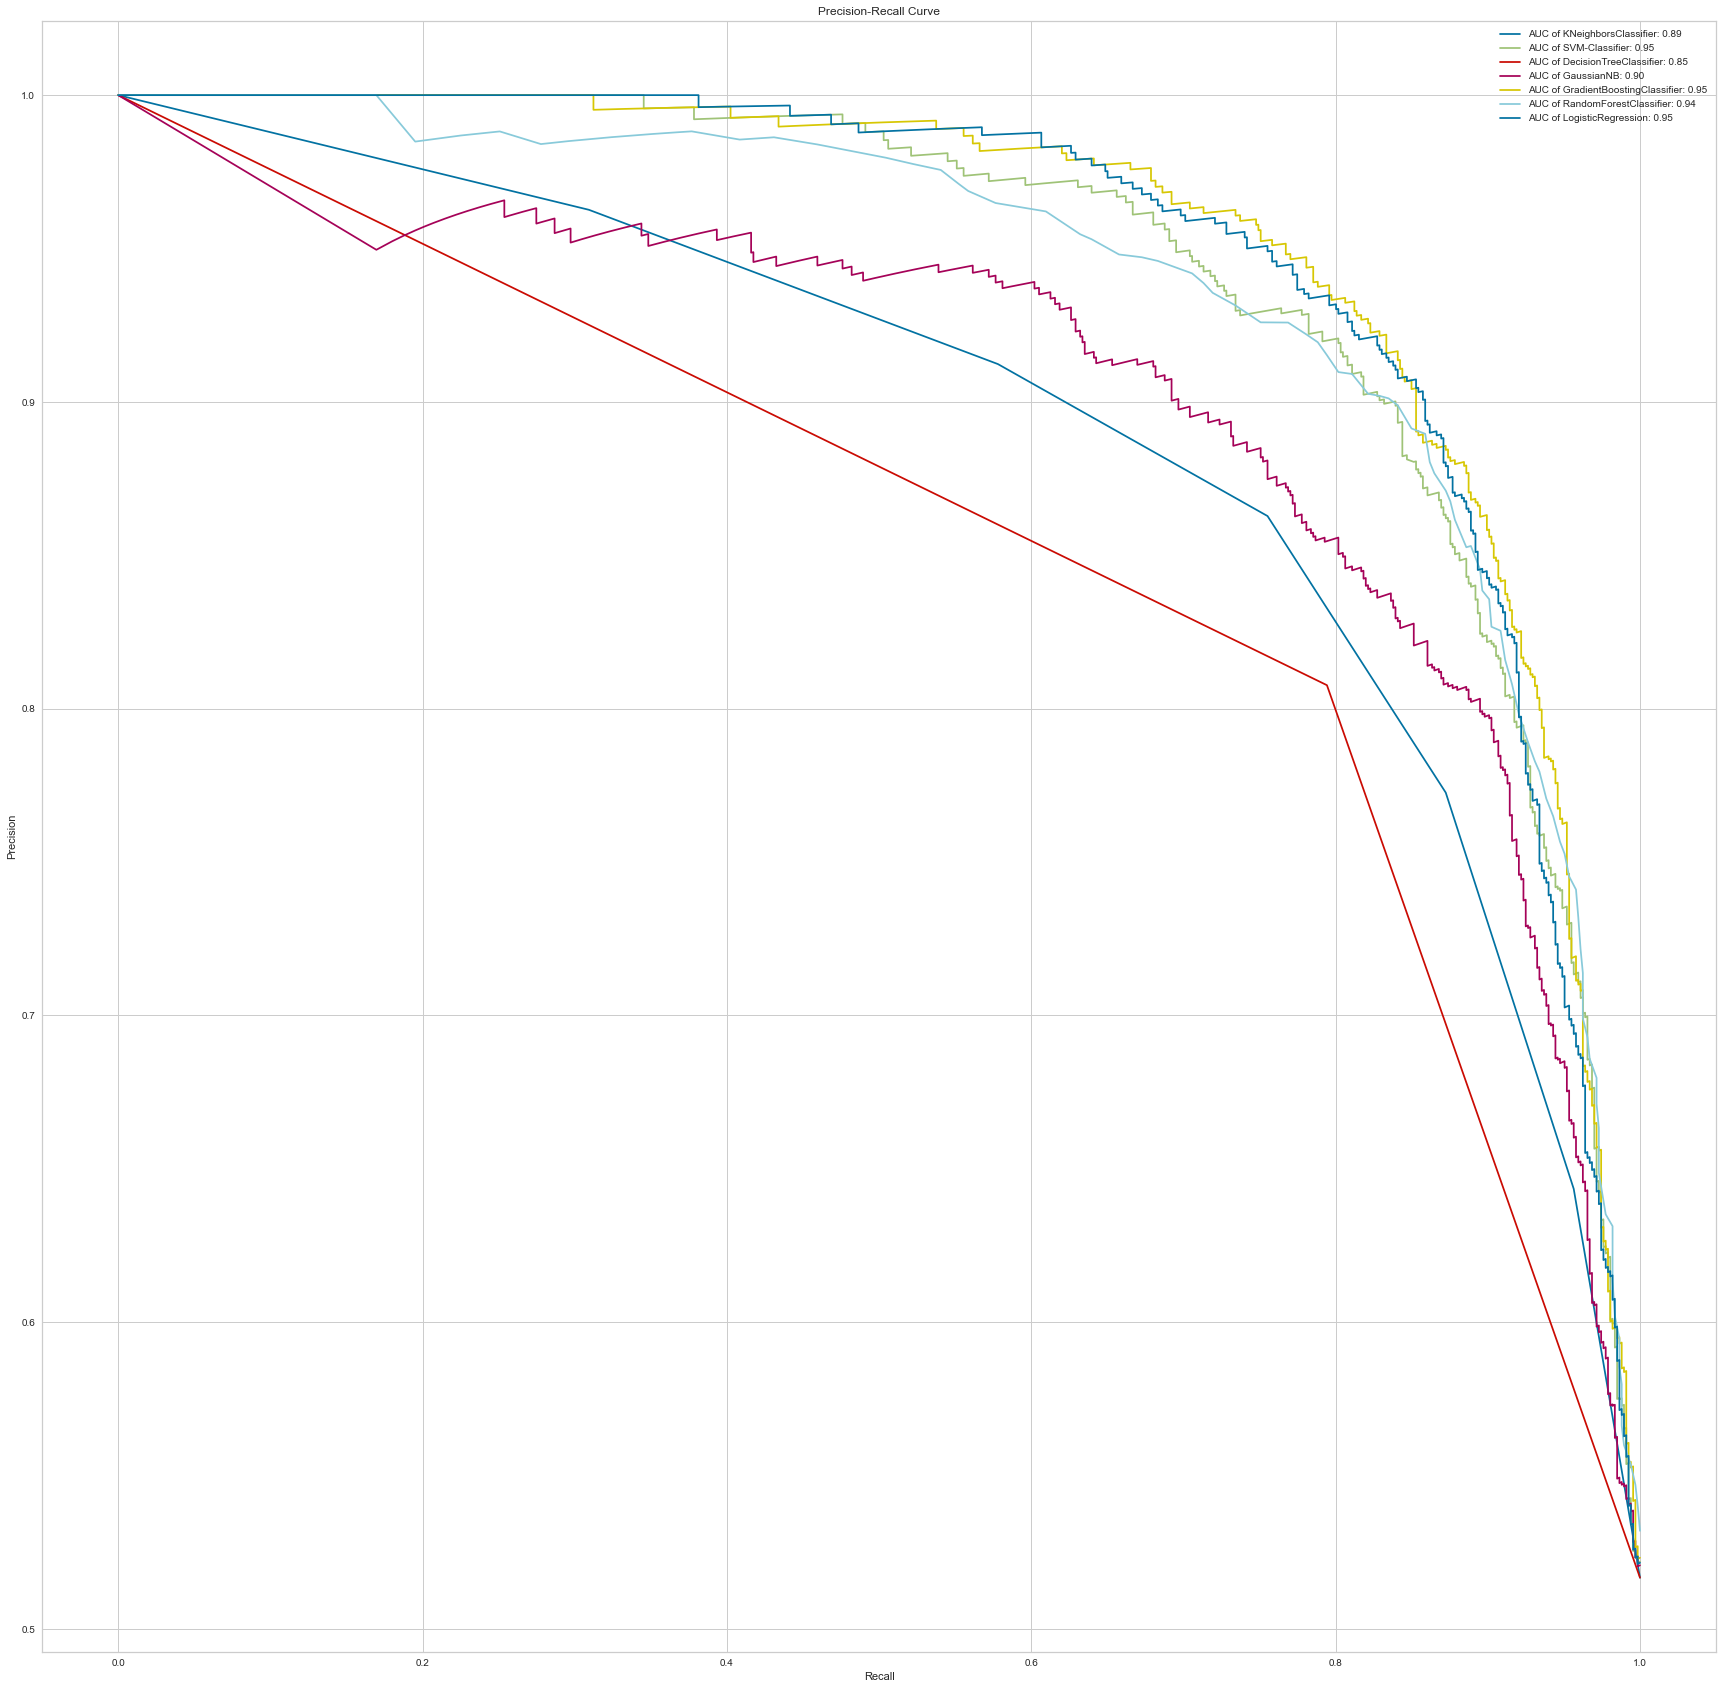

In [58]:
counter = 0
plt.figure(figsize=(30,30))

for model in models:
    if counter ==1:
        svc = SVC(probability=True)
        svc.fit(X=X_train,y=y_train)
        name = "SVM-Classifier"
        probabilities_classification = svc.predict_proba(X_test)[:,1] #gets the raw prediction 
        precision_lr, recall_lr, _ = precision_recall_curve(y_test, probabilities_classification)
        auc_lr = auc(recall_lr, precision_lr)
        plt.plot(recall_lr,precision_lr,label = "AUC of {}: {:.2f}".format(name,auc_lr))
        
    
    
    if counter !=1 : #dirty trick to skip SVM since it needs finetuning
        model.fit(X=X_train,y=y_train)
        name= str(model)
      
        #Precision Recall Curve and the respective area under curve to evaluate our Classifier and find the best two with whom we will continue working.
        #Here we search for an ideal classifier that has the best tradeoff between recall and precision. we want to accuratly classify someone as positive and negative at the same time
        #hence Precision Recall Curve makes sense to use here.

        probabilities_classification = model.predict_proba(X_test)[:,1]
        precision_lr, recall_lr, _ = precision_recall_curve(y_test, probabilities_classification)
        auc_lr = auc(recall_lr, precision_lr)
        plt.plot(recall_lr,precision_lr,label = "AUC of {}: {:.2f}".format(name[:-2],auc_lr))
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title("Precision-Recall Curve")
        plt.legend(fontsize = 10)
    counter+=1
    
plt.show()

Wow, all Classifiers have a really good AUC which is good news for us! One side note is, here I couldn't manage to implements SVM-Classifier in the upper cellsince it would need fine tuning for the model so I set probabilites = True and coupled to this, SVC already has a 5 fold cross-validation (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
Sofar Logistic Regression looks like a good candidate to continue looking at. Random Forrests,Gradiend boost classifier and SVM look good too.


In [59]:
names = list()
for model in  models:
    names.append(str(model)[:-2])


Text(0, 0.5, 'Model')

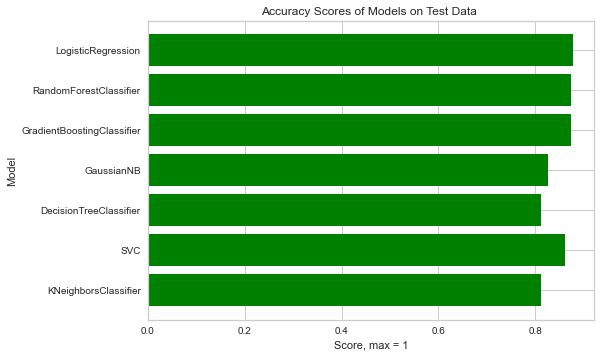

In [60]:
plt.figure()
plt.barh(names,scores,color = "green")
plt.title("Accuracy Scores of Models on Test Data ")
plt.xlabel("Score, max = 1")
plt.ylabel("Model")

Text(0, 0.5, 'Model')

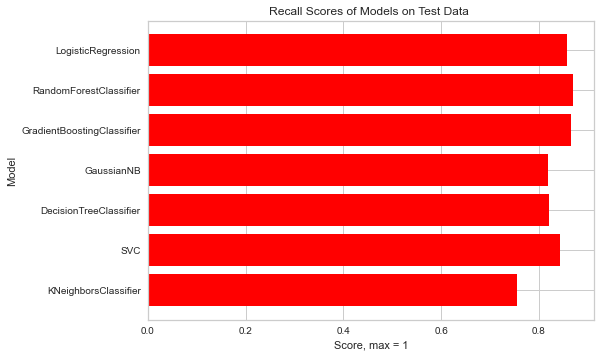

In [61]:
plt.figure()
plt.barh(names,recall,color = "red")
plt.title("Recall Scores of Models on Test Data ")
plt.xlabel("Score, max = 1")
plt.ylabel("Model")

Text(0, 0.5, 'Model')

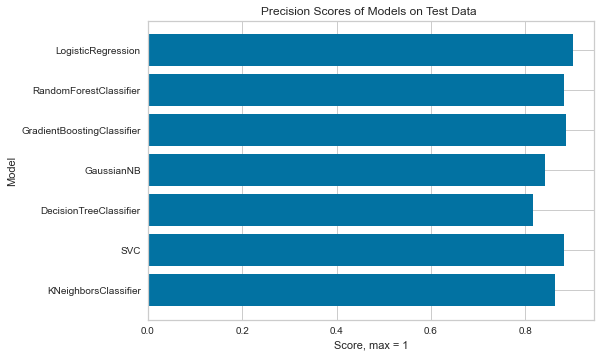

In [62]:
plt.figure()
plt.barh(names,precision)
plt.title("Precision Scores of Models on Test Data ")
plt.xlabel("Score, max = 1")
plt.ylabel("Model")

### Improvement of the models

I will choose Logistic Regression since it has the highest accuracy score on our test data. since we dont have class imbalance its a good measurement. Furthermore
random Forrest Classifier is also good because it has the highest recall which means we detects false negatives the best.

We can improve our two models with kfold crossvalidation 
and GRID-Crossvalidation to finetune the ideal hyperparameters. Important is to optimize the hyperparameters on the training data;else we could overfit our model

C:\Users\thoma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.877
Recall: 0.857
Precision: 0.901


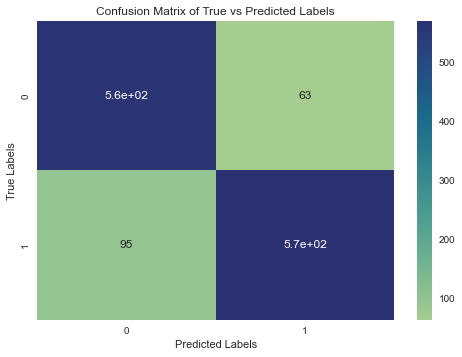

+2.34 (sdev = +2.33): Glucose [+2.72]
-2.20 (sdev = +0.06): Total Lipids in Small LDL [+0.00]
+1.50 (sdev = +0.02): Free Cholesterol in Small HDL [+3208523559638634489710344382490129465344.00]
+1.40 (sdev = +0.02): Triglycerides in Very Small VLDL [+191789809178993196510354604032.00]
+1.38 (sdev = +0.01): Free Cholesterol in Small LDL [+81939379077646696023975589931983010098743083008.00]
-1.15 (sdev = +0.02): Triglycerides in Medium HDL [+0.00]
-1.12 (sdev = +0.22): Total Lipids in Medium HDL [+0.01]
-0.86 (sdev = +0.00): Triglycerides in Very Large HDL [+0.00]
-0.82 (sdev = +0.31): Total Lipids in IDL [+0.07]
+0.73 (sdev = +0.08): Total Lipids in Very Large HDL [+15608.60]
+0.67 (sdev = +5.36): BMI [+1.13]
+0.61 (sdev = +1.17): Lactate [+1.68]
+0.54 (sdev = +0.80): Polyunsaturated Fatty Acids [+1.96]
-0.46 (sdev = +0.39): Total Lipids in Large LDL [+0.30]
+0.43 (sdev = +0.10): Alanine [+89.56]
+0.42 (sdev = +0.02): Triglycerides in Small HDL [+42020479146.15]
-0.41 (sdev = +0.49): Tot

In [63]:
data = df_processed.copy()#relevant data
X = data[features]
y =data['diabetes_status']
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=2022,stratify = y) #setting training and testing set stratification is here that we have a balanced class label set!

scaler = StandardScaler()
#Standardizes our data like df_standardize, however diabetes status is preserved

X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)


cf_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='crest')
plt.ylabel("True Labels");plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix of True vs Predicted Labels")
plt.show()

coefs_and_names = list(zip(model.coef_.ravel(), scaler.var_.ravel(), X.columns.tolist()))
for coef, var, name in sorted(coefs_and_names, key=lambda x: -abs(x[0])):
    print('{:+.2f} (sdev = {:+.2f}): {} [{:+.2f}]'.format(coef, np.sqrt(var), name, np.exp(coef / np.sqrt(var))))


we see Glucose, Total Lipids in Small LDL & Free Cholesterol in SMall LDL are themost important predictors.
an increase of glucose by 1 unit will result in an increses by factor 2.72 on the Data that is not standardized.

on the left we see the log odds of our model prediction ordered according to the biggest contributor.

Fruthermore Genetic PC 1 > Genetic PC 3 > Gentic PC 2 for this method regarding the prediction importance

Accuracy: 0.868
Recall: 0.865
Precision: 0.878


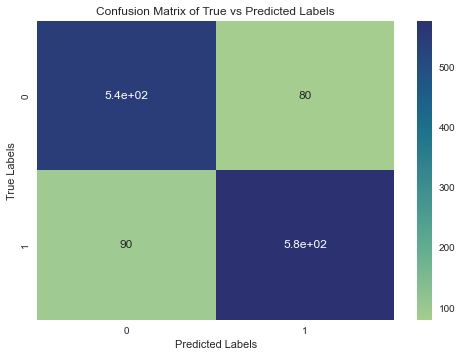

feature: 3-Hydroxybutyrate, importance: 0.01126
feature: Acetate, importance: 0.00635
feature: Acetoacetate, importance: 0.00765
feature: Acetone, importance: 0.00660
feature: Alanine, importance: 0.02111
feature: Albumin, importance: 0.00678
feature: Average Diameter for LDL Particles, importance: 0.01143
feature: Average Diameter for VLDL Particles, importance: 0.01097
feature: Citrate, importance: 0.01182
feature: Creatinine, importance: 0.00744
feature: Degree of Unsaturation, importance: 0.00792
feature: Docosahexaenoic Acid, importance: 0.00725
feature: Free Cholesterol in Small HDL, importance: 0.00659
feature: Free Cholesterol in Small LDL, importance: 0.04392
feature: Glucose, importance: 0.12428
feature: Glutamine, importance: 0.00748
feature: Glycine, importance: 0.00866
feature: Glycoprotein Acetyls, importance: 0.01313
feature: Histidine, importance: 0.00657
feature: Isoleucine, importance: 0.01038
feature: Lactate, importance: 0.01164
feature: Omega-3 Fatty Acids, importa

In [64]:
data = df_processed.copy()#relevant data
X = data[features]
y =data['diabetes_status']
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=2022,stratify = y) #setting training and testing set stratification is here that we have a balanced class label set!


model = RandomForestClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)


cf_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='crest')
plt.ylabel("True Labels");plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix of True vs Predicted Labels")
plt.show()

importance = model.feature_importances_
for feat, importance in zip(data.columns, model.feature_importances_):
    print( 'feature: {}, importance: {:.5f}'.format(feat, importance))

In [65]:
indices = np.argsort(model.feature_importances_)
indices_relev = indices[-5:]

In [66]:
#top 5 most important features
for indices in indices_relev:
    print("Feature: {}, importance: {:.3f}".format(data.columns[indices], model.feature_importances_[indices]))


Feature: Free Cholesterol in Small LDL, importance: 0.044
Feature: Vascular/heart problems diagnosed by doctor, importance: 0.044
Feature: Total Lipids in Large LDL, importance: 0.049
Feature: Total Lipids in IDL, importance: 0.064
Feature: Glucose, importance: 0.124


In [67]:
from sklearn.model_selection import GridSearchCV

#this part has to be run on euler or a better cpu than a surface book has.

In [68]:
data = df_processed.copy()#relevant data
X = data[features]
y =data['diabetes_status']
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=2022,stratify = y) #setting training and testing set stratification is here that we have a balnced class label set!

scaler = StandardScaler()
#Standardizes our data like df_standardize, however diabetes status is preserved

X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [ ]:
model =  RandomForestClassifier(random_state=2022)

# decide the hyperparameters to be tested
min_samples_split = [2,3,4]                                      
max_depth=[3,4,5,8, None]
criterion= ['gini','entropy']
parameters_rf=dict(min_samples_split=min_samples_split,criterion=criterion,max_depth=max_depth)
#taken from 
#training random forest model with combinations of all hyperparameters above using GridSearchCV
# GridSearchCV will find the hyperparameters that will give you the best predictions in cross validation according to the scoring method chosen
gridrf=GridSearchCV(model,parameters_rf,cv=10, scoring = 'accuracy')
gridrf.fit(X_train,y_train)

In [ ]:
model =  LogisticRegression(random_state=2022)

# decide the hyperparameters to be tested
penalty = ['l1', 'l2', 'elasticnet', None]
solver= ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
parameters_lr=dict(penalty=penalty,solver=solver)

#training random forest model with combinations of all hyperparameters above using GridSearchCV
# GridSearchCV will find the hyperparameters that will give you the best predictions in cross validation according to the scoring method chosen
gridlr=GridSearchCV(model,parameters_lr,cv=10, scoring = 'accuracy')
gridlr.fit(X_train,y_train)


In [ ]:
def examinebestmodel(model_name):
    print(model_name.best_score_)
    print(model_name.best_params_)
    print(model_name.best_estimator_)


In [ ]:
examinebestmodel(gridrf)

In [ ]:
examinebestmodel(gridlr)

In [ ]:
test_prediction_rf=gridrf.best_estimator_.predict(X_test)
compute_metrics(y_test, test_prediction_rf)


cf_matrix=confusion_matrix(y_test, test_prediction_rf)

sns.heatmap(cf_matrix, annot=True, cmap='RdBu')
plt.ylabel("True Labels");plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix of True vs Predicted Labels of Random Forest Classifier Grid-CV")
plt.show()


In [ ]:
test_prediction_lr = gridlr.best_estimator_.predict(X_test)

compute_metrics(y_test, test_prediction_lr)


cf_matrix=confusion_matrix(y_test, test_prediction_lr)
sns.heatmap(cf_matrix, annot=True, cmap='RdBu')
plt.ylabel("True Labels");plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix of True vs Predicted Labels of Logistic Regression Grid-CV")
plt.show()
